# Flat or Apartment Price prediction :

Calculators and human inputs became somehow useless in the age of ML and AI .
Machine Learning has changed construction and housing industry .

This project is all about predicting the flat or apartment price in Mumbai .Price is our target variable in this project . These dataset needs extreme cleaning because it has mixed or wrong values in almost all columns . I have done all the data cleaning part , then do some EDA or data analysis . In the end i have done the prediction part and i have got a r2_score of 99.72 which is pretty good .

I have used 5 different ML algorithms along with hyperparameter tuning to get the best prediction and least error . Please have a look in this project if you want to see extensive data cleaning and Predictive analysis .

In [5]:
## Import numpy and pandas for data analysis .
## Import matplotlib,seaborn and plotly.express for data visualization .
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [6]:
flats_raw=pd.read_csv("/content/mumbai_flats.csv")
flat=flats_raw.copy()
flat.head()  ## head function will show us the top 5 rows .

,flat_type,price,address,buildup_area,avg_price_sqft,age_of_property,possesion_status,which_floor,facing,furnicing,project_name,brokrage,carpet_area,bedrooms,bathrooms,balcony,parking,about_property
0,3 BHK Flat,3.95 Cr,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550 sq.ft,₹25.48 K/sq.ft,3 Year Old,Ready to move,Higherof 50 floors,Fully Furnished,NaN,Runwal Forest Tower 5 To 8,4.0 LacsAccess Zero Brokerage Properties,1130 sq.ft,3,2,1,2 Covered Parking,Exclusive 3 bhk with 3 bathroom apartment ava...
1,1 BHK Flat,19.0 L,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630 sq.ft,₹3.02 K/sq.ft,3 Year Old,Ready to move,Middleof 4 floors,Unfurnished,NaN,Ananta Vardhman Nagar,No ChargeAccess Zero Brokerage Properties,390 sq.ft,1,1,2,1 Open Parking,"1 BHK Flat for sale in Palghar, Mumbai - conta..."
2,1 BHK Flat,73.0 L,"JP North Barcelona, Kashimira, Mira Road East,...",580 sq.ft,₹12.59 K/sq.ft,1 Years Old,Ready to move,Lowerof 25 floors,Semi Furnished,NaN,JP North Barcelona,1.5 LacsAccess Zero Brokerage Properties,475 sq.ft,1,2,2,No Parking,1 BHK Flat for sale in Mumbai. This property i...
3,1 BHK Flat,1.1 Cr,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410 sq.ft,₹26.83 K/sq.ft,1 Years Old,Ready to move,Higherof 35 floors,Semi Furnished,NaN,Chandak Nischay,1.1 LacsAccess Zero Brokerage Properties,368 sq.ft,1,2,1,2 Covered Parking,Check out this 1 BHK Flat for sale in Dahisar ...
4,3 BHK Flat,2.25 Cr,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052 sq.ft,₹21.39 K/sq.ft,1 Years Old,Ready to move,Lowerof 26 floors,Semi Furnished,NaN,Neelam Solstice Phase I,2.1 LacsAccess Zero Brokerage Properties,915 sq.ft,3,2,3,1 Covered Parking,"Situated in ghatkopar east, central mumbai sub..."


In [7]:
flat.info() ## info function will show total no of non null rows , datatypes of all the columns .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9955 entries, 0 to 9954
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   flat_type         9955 non-null   object
 1   price             9954 non-null   object
 2   address           9955 non-null   object
 3   buildup_area      9955 non-null   object
 4   avg_price_sqft    9955 non-null   object
 5   age_of_property   9955 non-null   object
 6   possesion_status  9954 non-null   object
 7   which_floor       9907 non-null   object
 8   facing            7972 non-null   object
 9   furnicing         1 non-null      object
 10  project_name      9954 non-null   object
 11  brokrage          9954 non-null   object
 12  carpet_area       9954 non-null   object
 13  bedrooms          9954 non-null   object
 14  bathrooms         9819 non-null   object
 15  balcony           9740 non-null   object
 16  parking           9954 non-null   object
 17  about_property

In [8]:
## dropping some unnecessary columns with drop() function .
flat=flat.drop(['furnicing','about_property'],axis=1)

In [9]:
## columns will show the name of all columns .
flat.columns

Index(['flat_type', 'price', 'address', 'buildup_area', 'avg_price_sqft',
       'age_of_property', 'possesion_status', 'which_floor', 'facing',
       'project_name', 'brokrage', 'carpet_area', 'bedrooms', 'bathrooms',
       'balcony', 'parking'],
      dtype='object')

Renaming some columns to make them more accurate and understandable .

In [10]:
flat=flat.rename(columns={'flat_type':'Flat_type','price':'Price','address':'Address','buildup_area':'Buildup_area',
                          'avg_price_sqft':'Avg_price_sqft','age_of_property':'Property_age','possesion_status':'Possesion',
                          'which_floor':'Floor','facing':'Furnishing','project_name':'Project_name','brokrage':'Brokrage',
                          'carpet_area':'Carpet_area','bedrooms':'Bedrooms','bathrooms':'Bathrooms','balcony':'Balcony','parking':'Parking'})
flat.head()  ## head function will show us the top 5 rows .

,Flat_type,Price,Address,Buildup_area,Avg_price_sqft,Property_age,Possesion,Floor,Furnishing,Project_name,Brokrage,Carpet_area,Bedrooms,Bathrooms,Balcony,Parking
0,3 BHK Flat,3.95 Cr,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550 sq.ft,₹25.48 K/sq.ft,3 Year Old,Ready to move,Higherof 50 floors,Fully Furnished,Runwal Forest Tower 5 To 8,4.0 LacsAccess Zero Brokerage Properties,1130 sq.ft,3,2,1,2 Covered Parking
1,1 BHK Flat,19.0 L,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630 sq.ft,₹3.02 K/sq.ft,3 Year Old,Ready to move,Middleof 4 floors,Unfurnished,Ananta Vardhman Nagar,No ChargeAccess Zero Brokerage Properties,390 sq.ft,1,1,2,1 Open Parking
2,1 BHK Flat,73.0 L,"JP North Barcelona, Kashimira, Mira Road East,...",580 sq.ft,₹12.59 K/sq.ft,1 Years Old,Ready to move,Lowerof 25 floors,Semi Furnished,JP North Barcelona,1.5 LacsAccess Zero Brokerage Properties,475 sq.ft,1,2,2,No Parking
3,1 BHK Flat,1.1 Cr,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410 sq.ft,₹26.83 K/sq.ft,1 Years Old,Ready to move,Higherof 35 floors,Semi Furnished,Chandak Nischay,1.1 LacsAccess Zero Brokerage Properties,368 sq.ft,1,2,1,2 Covered Parking
4,3 BHK Flat,2.25 Cr,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052 sq.ft,₹21.39 K/sq.ft,1 Years Old,Ready to move,Lowerof 26 floors,Semi Furnished,Neelam Solstice Phase I,2.1 LacsAccess Zero Brokerage Properties,915 sq.ft,3,2,3,1 Covered Parking


In [11]:
print("The size of the dataset :",flat.shape)

The size of the dataset : (9955, 16)


In [12]:
## Creating a for loop with isnull().sum() function to see the percentage of null values in each column .
for i in flat.columns :
  print(f"Percentage of null values in {i} :", (flat[i].isnull().sum()*100)/len(flat[i]))

Percentage of null values in Flat_type : 0.0
Percentage of null values in Price : 0.010045203415369162
Percentage of null values in Address : 0.0
Percentage of null values in Buildup_area : 0.0
Percentage of null values in Avg_price_sqft : 0.0
Percentage of null values in Property_age : 0.0
Percentage of null values in Possesion : 0.010045203415369162
Percentage of null values in Floor : 0.48216976393771976
Percentage of null values in Furnishing : 19.919638372677046
Percentage of null values in Project_name : 0.010045203415369162
Percentage of null values in Brokrage : 0.010045203415369162
Percentage of null values in Carpet_area : 0.010045203415369162
Percentage of null values in Bedrooms : 0.010045203415369162
Percentage of null values in Bathrooms : 1.366147664490206
Percentage of null values in Balcony : 2.1597187343043696
Percentage of null values in Parking : 0.010045203415369162


In [13]:
flat=flat.dropna(subset='Price')

In [14]:
## Apply a lambda function to clean our target data .
flat['Buildup_area']=flat['Buildup_area'].apply(lambda x:x.replace('sq.ft',''))
flat.head()  ## head function will show us the top 5 rows .

,Flat_type,Price,Address,Buildup_area,Avg_price_sqft,Property_age,Possesion,Floor,Furnishing,Project_name,Brokrage,Carpet_area,Bedrooms,Bathrooms,Balcony,Parking
0,3 BHK Flat,3.95 Cr,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550,₹25.48 K/sq.ft,3 Year Old,Ready to move,Higherof 50 floors,Fully Furnished,Runwal Forest Tower 5 To 8,4.0 LacsAccess Zero Brokerage Properties,1130 sq.ft,3,2,1,2 Covered Parking
1,1 BHK Flat,19.0 L,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630,₹3.02 K/sq.ft,3 Year Old,Ready to move,Middleof 4 floors,Unfurnished,Ananta Vardhman Nagar,No ChargeAccess Zero Brokerage Properties,390 sq.ft,1,1,2,1 Open Parking
2,1 BHK Flat,73.0 L,"JP North Barcelona, Kashimira, Mira Road East,...",580,₹12.59 K/sq.ft,1 Years Old,Ready to move,Lowerof 25 floors,Semi Furnished,JP North Barcelona,1.5 LacsAccess Zero Brokerage Properties,475 sq.ft,1,2,2,No Parking
3,1 BHK Flat,1.1 Cr,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410,₹26.83 K/sq.ft,1 Years Old,Ready to move,Higherof 35 floors,Semi Furnished,Chandak Nischay,1.1 LacsAccess Zero Brokerage Properties,368 sq.ft,1,2,1,2 Covered Parking
4,3 BHK Flat,2.25 Cr,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052,₹21.39 K/sq.ft,1 Years Old,Ready to move,Lowerof 26 floors,Semi Furnished,Neelam Solstice Phase I,2.1 LacsAccess Zero Brokerage Properties,915 sq.ft,3,2,3,1 Covered Parking


In [15]:
flat.Property_age.value_counts() ## Value_counts() will show us total count of each distinct items in a column .

Property_age
1 Years Old      1718
5 Year Old       1300
10 Year Old       963
2 Year Old        759
Ready to move     728
15 Year Old       640
3 Year Old        615
4 Year Old        504
20 Year Old       382
8 Year Old        375
7 Year Old        345
12 Year Old       327
6 Year Old        292
9 Year Old        151
25 Year Old       148
30 Year Old        84
18 Year Old        79
1 BHK              63
2 BHK              61
14 Year Old        57
3 BHK              38
16 Year Old        38
13 Year Old        38
40 Year Old        34
11 Year Old        32
17 Year Old        25
22 Year Old        22
35 Year Old        21
4 BHK              16
23 Year Old        15
19 Year Old        14
50 Year Old        10
45 Year Old         8
26 Year Old         6
21 Year Old         5
28 Year Old         5
38 Year Old         5
24 Year Old         4
31 Year Old         4
42 Year Old         3
32 Year Old         3
29 Year Old         2
52 Year Old         2
60 Year Old         2
27 Year Old        

In [16]:
import re ## Importing re or regexp.

In [17]:
## Creating a function to clean our data precisely .
def clean_text(text) :
  text=re.sub('Years Old','',text)
  text=re.sub('Year Old','',text)
  text=re.sub('BHK','',text)
  text=re.sub('Ready to move','0',text)
  return text

In [18]:
## Apply a function to clean our target data .
flat['New_property_age']=flat['Property_age'].apply(clean_text)

In [19]:
flat.head()

,Flat_type,Price,Address,Buildup_area,Avg_price_sqft,Property_age,Possesion,Floor,Furnishing,Project_name,Brokrage,Carpet_area,Bedrooms,Bathrooms,Balcony,Parking,New_property_age
0,3 BHK Flat,3.95 Cr,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550,₹25.48 K/sq.ft,3 Year Old,Ready to move,Higherof 50 floors,Fully Furnished,Runwal Forest Tower 5 To 8,4.0 LacsAccess Zero Brokerage Properties,1130 sq.ft,3,2,1,2 Covered Parking,3
1,1 BHK Flat,19.0 L,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630,₹3.02 K/sq.ft,3 Year Old,Ready to move,Middleof 4 floors,Unfurnished,Ananta Vardhman Nagar,No ChargeAccess Zero Brokerage Properties,390 sq.ft,1,1,2,1 Open Parking,3
2,1 BHK Flat,73.0 L,"JP North Barcelona, Kashimira, Mira Road East,...",580,₹12.59 K/sq.ft,1 Years Old,Ready to move,Lowerof 25 floors,Semi Furnished,JP North Barcelona,1.5 LacsAccess Zero Brokerage Properties,475 sq.ft,1,2,2,No Parking,1
3,1 BHK Flat,1.1 Cr,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410,₹26.83 K/sq.ft,1 Years Old,Ready to move,Higherof 35 floors,Semi Furnished,Chandak Nischay,1.1 LacsAccess Zero Brokerage Properties,368 sq.ft,1,2,1,2 Covered Parking,1
4,3 BHK Flat,2.25 Cr,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052,₹21.39 K/sq.ft,1 Years Old,Ready to move,Lowerof 26 floors,Semi Furnished,Neelam Solstice Phase I,2.1 LacsAccess Zero Brokerage Properties,915 sq.ft,3,2,3,1 Covered Parking,1


In [20]:
## Value_counts() will show us total count of each distinct items in a column .
flat.New_property_age.value_counts()

New_property_age
1      1781
5      1301
10      963
2       820
0       728
3       653
15      640
4       520
20      382
8       375
7       345
12      327
6       292
9       151
25      148
30       84
18       79
14       57
16       38
13       38
40       34
11       32
17       25
22       22
35       21
23       15
19       14
50       10
45        8
26        6
38        5
21        5
28        5
24        4
31        4
32        3
42        3
29        2
52        2
60        2
36        1
48        1
80        1
71        1
90        1
41        1
53        1
27        1
99        1
37        1
Name: count, dtype: int64

In [21]:
## Value_counts() will show us total count of each distinct items in a column .
flat.Parking.value_counts()

Parking
1 Covered Parking               3331
1 Open Parking                  2677
2 Covered Parking               1155
1 Covered and 1 Open Parking    1121
No Parking                       890
3 Covered Parking                235
2 Covered and 1 Open Parking     165
2 Open Parking                   104
-                                 50
1 Covered and 2 Open Parking      46
4 Covered Parking                 45
2 Covered and 2 Open Parking      44
3 Covered and 1 Open Parking      24
3 Covered and 2 Open Parking      17
3 Open Parking                    14
3 Covered and 3 Open Parking       9
4 Open Parking                     5
5 Covered Parking                  3
2 Covered and 3 Open Parking       3
6 Covered Parking                  2
4 Covered and 4 Open Parking       2
8 Covered Parking                  2
3 Covered and 4 Open Parking       2
1 Covered and 3 Open Parking       2
4 Covered and 1 Open Parking       1
4 Covered and 2 Open Parking       1
5 Covered and 1 Open Parking  

In [22]:
## Creating a function to clean our data precisely .
def clean_parking(parking) :
  parking=re.sub('Covered Parking','',parking)
  parking=re.sub('Open Parking','',parking)
  parking=re.sub('-','0',parking)
  parking=re.sub('No Parking','0',parking)
  parking=re.sub('Covered and Open Parking',',',parking)
  return parking

In [23]:
## Apply a function to clean our target data .
flat['New_parking']=flat['Parking'].apply(clean_parking)
flat.head()  ## head function will show us the top 5 rows .

,Flat_type,Price,Address,Buildup_area,Avg_price_sqft,Property_age,Possesion,Floor,Furnishing,Project_name,Brokrage,Carpet_area,Bedrooms,Bathrooms,Balcony,Parking,New_property_age,New_parking
0,3 BHK Flat,3.95 Cr,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550,₹25.48 K/sq.ft,3 Year Old,Ready to move,Higherof 50 floors,Fully Furnished,Runwal Forest Tower 5 To 8,4.0 LacsAccess Zero Brokerage Properties,1130 sq.ft,3,2,1,2 Covered Parking,3,2
1,1 BHK Flat,19.0 L,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630,₹3.02 K/sq.ft,3 Year Old,Ready to move,Middleof 4 floors,Unfurnished,Ananta Vardhman Nagar,No ChargeAccess Zero Brokerage Properties,390 sq.ft,1,1,2,1 Open Parking,3,1
2,1 BHK Flat,73.0 L,"JP North Barcelona, Kashimira, Mira Road East,...",580,₹12.59 K/sq.ft,1 Years Old,Ready to move,Lowerof 25 floors,Semi Furnished,JP North Barcelona,1.5 LacsAccess Zero Brokerage Properties,475 sq.ft,1,2,2,No Parking,1,0
3,1 BHK Flat,1.1 Cr,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410,₹26.83 K/sq.ft,1 Years Old,Ready to move,Higherof 35 floors,Semi Furnished,Chandak Nischay,1.1 LacsAccess Zero Brokerage Properties,368 sq.ft,1,2,1,2 Covered Parking,1,2
4,3 BHK Flat,2.25 Cr,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052,₹21.39 K/sq.ft,1 Years Old,Ready to move,Lowerof 26 floors,Semi Furnished,Neelam Solstice Phase I,2.1 LacsAccess Zero Brokerage Properties,915 sq.ft,3,2,3,1 Covered Parking,1,1


In [24]:
## Value_counts() will show us total count of each distinct items in a column .
flat.New_parking.value_counts()

New_parking
1                   6008
2                   1259
1 Covered and 1     1121
0                    940
3                    249
2 Covered and 1      165
4                     50
1 Covered and 2       46
2 Covered and 2       44
3 Covered and 1       24
3 Covered and 2       17
3 Covered and 3        9
5                      3
2 Covered and 3        3
8                      2
1 Covered and 3        2
3 Covered and 4        2
4 Covered and 4        2
6                      2
4 Covered and 2        1
4 Covered and 1        1
5 Covered and 1        1
2 Covered and 4        1
1 Covered and 5        1
9                      1
Name: count, dtype: int64

In [25]:
## Apply a lambda function to clean our target data .
flat['New_parking']=flat['New_parking'].apply(lambda x:x.replace('Covered and',','))

In [26]:
## Value_counts() will show us total count of each distinct items in a column .
flat['New_parking'].value_counts()

New_parking
1         6008
2         1259
1 , 1     1121
0          940
3          249
2 , 1      165
4           50
1 , 2       46
2 , 2       44
3 , 1       24
3 , 2       17
3 , 3        9
5            3
2 , 3        3
8            2
1 , 3        2
3 , 4        2
4 , 4        2
6            2
4 , 2        1
4 , 1        1
5 , 1        1
2 , 4        1
1 , 5        1
9            1
Name: count, dtype: int64

In [27]:
## Apply a map and lambda function to clean our target data .
flat['last_parking']=flat['New_parking'].map(lambda x:sum(map(int,x.split(','))))
flat.head()

,Flat_type,Price,Address,Buildup_area,Avg_price_sqft,Property_age,Possesion,Floor,Furnishing,Project_name,Brokrage,Carpet_area,Bedrooms,Bathrooms,Balcony,Parking,New_property_age,New_parking,last_parking
0,3 BHK Flat,3.95 Cr,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550,₹25.48 K/sq.ft,3 Year Old,Ready to move,Higherof 50 floors,Fully Furnished,Runwal Forest Tower 5 To 8,4.0 LacsAccess Zero Brokerage Properties,1130 sq.ft,3,2,1,2 Covered Parking,3,2,2
1,1 BHK Flat,19.0 L,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630,₹3.02 K/sq.ft,3 Year Old,Ready to move,Middleof 4 floors,Unfurnished,Ananta Vardhman Nagar,No ChargeAccess Zero Brokerage Properties,390 sq.ft,1,1,2,1 Open Parking,3,1,1
2,1 BHK Flat,73.0 L,"JP North Barcelona, Kashimira, Mira Road East,...",580,₹12.59 K/sq.ft,1 Years Old,Ready to move,Lowerof 25 floors,Semi Furnished,JP North Barcelona,1.5 LacsAccess Zero Brokerage Properties,475 sq.ft,1,2,2,No Parking,1,0,0
3,1 BHK Flat,1.1 Cr,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410,₹26.83 K/sq.ft,1 Years Old,Ready to move,Higherof 35 floors,Semi Furnished,Chandak Nischay,1.1 LacsAccess Zero Brokerage Properties,368 sq.ft,1,2,1,2 Covered Parking,1,2,2
4,3 BHK Flat,2.25 Cr,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052,₹21.39 K/sq.ft,1 Years Old,Ready to move,Lowerof 26 floors,Semi Furnished,Neelam Solstice Phase I,2.1 LacsAccess Zero Brokerage Properties,915 sq.ft,3,2,3,1 Covered Parking,1,1,1


In [28]:
## Value_counts() will show us total count of each distinct items in a column .
flat['last_parking'].value_counts()

last_parking
1    6008
2    2380
0     940
3     460
4     120
5      24
6      15
8       4
7       2
9       1
Name: count, dtype: int64

In [29]:
flat=flat.drop(['Property_age','Parking','New_parking'],axis=1)
flat.head()  ## head function will show us the top 5 rows .

,Flat_type,Price,Address,Buildup_area,Avg_price_sqft,Possesion,Floor,Furnishing,Project_name,Brokrage,Carpet_area,Bedrooms,Bathrooms,Balcony,New_property_age,last_parking
0,3 BHK Flat,3.95 Cr,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550,₹25.48 K/sq.ft,Ready to move,Higherof 50 floors,Fully Furnished,Runwal Forest Tower 5 To 8,4.0 LacsAccess Zero Brokerage Properties,1130 sq.ft,3,2,1,3,2
1,1 BHK Flat,19.0 L,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630,₹3.02 K/sq.ft,Ready to move,Middleof 4 floors,Unfurnished,Ananta Vardhman Nagar,No ChargeAccess Zero Brokerage Properties,390 sq.ft,1,1,2,3,1
2,1 BHK Flat,73.0 L,"JP North Barcelona, Kashimira, Mira Road East,...",580,₹12.59 K/sq.ft,Ready to move,Lowerof 25 floors,Semi Furnished,JP North Barcelona,1.5 LacsAccess Zero Brokerage Properties,475 sq.ft,1,2,2,1,0
3,1 BHK Flat,1.1 Cr,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410,₹26.83 K/sq.ft,Ready to move,Higherof 35 floors,Semi Furnished,Chandak Nischay,1.1 LacsAccess Zero Brokerage Properties,368 sq.ft,1,2,1,1,2
4,3 BHK Flat,2.25 Cr,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052,₹21.39 K/sq.ft,Ready to move,Lowerof 26 floors,Semi Furnished,Neelam Solstice Phase I,2.1 LacsAccess Zero Brokerage Properties,915 sq.ft,3,2,3,1,1


In [30]:
## Value_counts() will show us total count of each distinct items in a column .
flat['Carpet_area'].value_counts()

Carpet_area
2             1170
1             1076
3              877
4              349
450 sq.ft      181
              ... 
2156 sq.ft       1
2362 sq.ft       1
2190 sq.ft       1
1930 sq.ft       1
774 sq.ft        1
Name: count, Length: 1024, dtype: int64

In [31]:
## Apply a lambda function to clean our target data .
flat['Carpet_area']=flat['Carpet_area'].apply(lambda x:x.replace('sq.ft',''))
flat.head()

,Flat_type,Price,Address,Buildup_area,Avg_price_sqft,Possesion,Floor,Furnishing,Project_name,Brokrage,Carpet_area,Bedrooms,Bathrooms,Balcony,New_property_age,last_parking
0,3 BHK Flat,3.95 Cr,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550,₹25.48 K/sq.ft,Ready to move,Higherof 50 floors,Fully Furnished,Runwal Forest Tower 5 To 8,4.0 LacsAccess Zero Brokerage Properties,1130,3,2,1,3,2
1,1 BHK Flat,19.0 L,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630,₹3.02 K/sq.ft,Ready to move,Middleof 4 floors,Unfurnished,Ananta Vardhman Nagar,No ChargeAccess Zero Brokerage Properties,390,1,1,2,3,1
2,1 BHK Flat,73.0 L,"JP North Barcelona, Kashimira, Mira Road East,...",580,₹12.59 K/sq.ft,Ready to move,Lowerof 25 floors,Semi Furnished,JP North Barcelona,1.5 LacsAccess Zero Brokerage Properties,475,1,2,2,1,0
3,1 BHK Flat,1.1 Cr,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410,₹26.83 K/sq.ft,Ready to move,Higherof 35 floors,Semi Furnished,Chandak Nischay,1.1 LacsAccess Zero Brokerage Properties,368,1,2,1,1,2
4,3 BHK Flat,2.25 Cr,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052,₹21.39 K/sq.ft,Ready to move,Lowerof 26 floors,Semi Furnished,Neelam Solstice Phase I,2.1 LacsAccess Zero Brokerage Properties,915,3,2,3,1,1


In [32]:
## Value_counts() will show us total count of each distinct items in a column .
flat['Avg_price_sqft'].value_counts()

Avg_price_sqft
₹20 K/sq.ft       126
₹25 K/sq.ft        76
₹50 K/sq.ft        62
₹10 K/sq.ft        51
₹16.67 K/sq.ft     49
                 ... 
₹43.47 K/sq.ft      1
₹37.48 K/sq.ft      1
₹34.20 K/sq.ft      1
₹49.30 K/sq.ft      1
₹30.79 K/sq.ft      1
Name: count, Length: 3136, dtype: int64

In [33]:
price=flat['Price']

In [34]:
## Creating a function to clean our data precisely .
def clean_price(price) :
  try :
    if 'L' in price :
      price=price.replace('L','')
      return float(price)*100000
    elif 'Cr' in price :
      price=price.replace('Cr','')
      return float(price)*10000000
    else :
      return float(price)
  except ValueError :
    return None

In [35]:
## Apply a function to clean our target data .
flat['price_new']=flat['Price'].apply(clean_price)
flat.head()  ## head function will show us the top 5 rows .

,Flat_type,Price,Address,Buildup_area,Avg_price_sqft,Possesion,Floor,Furnishing,Project_name,Brokrage,Carpet_area,Bedrooms,Bathrooms,Balcony,New_property_age,last_parking,price_new
0,3 BHK Flat,3.95 Cr,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550,₹25.48 K/sq.ft,Ready to move,Higherof 50 floors,Fully Furnished,Runwal Forest Tower 5 To 8,4.0 LacsAccess Zero Brokerage Properties,1130,3,2,1,3,2,39500000.0
1,1 BHK Flat,19.0 L,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630,₹3.02 K/sq.ft,Ready to move,Middleof 4 floors,Unfurnished,Ananta Vardhman Nagar,No ChargeAccess Zero Brokerage Properties,390,1,1,2,3,1,1900000.0
2,1 BHK Flat,73.0 L,"JP North Barcelona, Kashimira, Mira Road East,...",580,₹12.59 K/sq.ft,Ready to move,Lowerof 25 floors,Semi Furnished,JP North Barcelona,1.5 LacsAccess Zero Brokerage Properties,475,1,2,2,1,0,7300000.0
3,1 BHK Flat,1.1 Cr,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410,₹26.83 K/sq.ft,Ready to move,Higherof 35 floors,Semi Furnished,Chandak Nischay,1.1 LacsAccess Zero Brokerage Properties,368,1,2,1,1,2,11000000.0
4,3 BHK Flat,2.25 Cr,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052,₹21.39 K/sq.ft,Ready to move,Lowerof 26 floors,Semi Furnished,Neelam Solstice Phase I,2.1 LacsAccess Zero Brokerage Properties,915,3,2,3,1,1,22500000.0


In [36]:
## Value_counts() will show us total count of each distinct items in a column .
flat.price_new.value_counts()

price_new
12500000.0    149
11000000.0    140
21000000.0    133
20000000.0    129
25000000.0    128
             ... 
4136000.0       1
6112000.0       1
6008000.0       1
3390000.0       1
77400000.0      1
Name: count, Length: 974, dtype: int64

In [37]:
flat.Brokrage.values

array(['4.0 LacsAccess Zero Brokerage Properties',
       'No ChargeAccess Zero Brokerage Properties',
       '1.5 LacsAccess Zero Brokerage Properties', ..., '40.0 L',
       'No ChargeAccess Zero Brokerage Properties', '90.0 L'],
      dtype=object)

In [38]:
## Creating a function to clean our data precisely .
def brok_clean(brok) :
  brok=re.sub('No ChargeAccess Zero Brokerage Properties','0',brok)
  brok=re.sub('Access Zero Brokerage Properties','',brok)

  return brok

In [39]:
## Apply a function to clean our target data .
flat['Clean_brok']=flat['Brokrage'].apply(brok_clean)
flat.head()

,Flat_type,Price,Address,Buildup_area,Avg_price_sqft,Possesion,Floor,Furnishing,Project_name,Brokrage,Carpet_area,Bedrooms,Bathrooms,Balcony,New_property_age,last_parking,price_new,Clean_brok
0,3 BHK Flat,3.95 Cr,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550,₹25.48 K/sq.ft,Ready to move,Higherof 50 floors,Fully Furnished,Runwal Forest Tower 5 To 8,4.0 LacsAccess Zero Brokerage Properties,1130,3,2,1,3,2,39500000.0,4.0 Lacs
1,1 BHK Flat,19.0 L,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630,₹3.02 K/sq.ft,Ready to move,Middleof 4 floors,Unfurnished,Ananta Vardhman Nagar,No ChargeAccess Zero Brokerage Properties,390,1,1,2,3,1,1900000.0,0
2,1 BHK Flat,73.0 L,"JP North Barcelona, Kashimira, Mira Road East,...",580,₹12.59 K/sq.ft,Ready to move,Lowerof 25 floors,Semi Furnished,JP North Barcelona,1.5 LacsAccess Zero Brokerage Properties,475,1,2,2,1,0,7300000.0,1.5 Lacs
3,1 BHK Flat,1.1 Cr,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410,₹26.83 K/sq.ft,Ready to move,Higherof 35 floors,Semi Furnished,Chandak Nischay,1.1 LacsAccess Zero Brokerage Properties,368,1,2,1,1,2,11000000.0,1.1 Lacs
4,3 BHK Flat,2.25 Cr,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052,₹21.39 K/sq.ft,Ready to move,Lowerof 26 floors,Semi Furnished,Neelam Solstice Phase I,2.1 LacsAccess Zero Brokerage Properties,915,3,2,3,1,1,22500000.0,2.1 Lacs


In [40]:
## Value_counts() will show us total count of each distinct items in a column .
flat.Clean_brok.value_counts()

Clean_brok
0            985
1.1 Lacs     193
1.9 Lacs     179
1.4 Lacs     164
1.0 Lac      164
            ... 
40.0 Cr        1
18.5 Lacs      1
5.18 Cr        1
10.4 Lacs      1
81,999         1
Name: count, Length: 874, dtype: int64

In [41]:
brok=flat['Clean_brok']

In [42]:
## Creating a function to clean our data precisely .
def brokerage(brok) :
  try :
    if 'Lacs' in brok :
      brok=brok.replace('Lacs','')
      return float(brok)*100000
    elif 'Lac' in brok :
      brok=brok.replace('Lac','')
      return float(brok)*100000
    elif 'Cr' in brok :
      brok=brok.replace('Cr','')
      return float(brok)*10000000
    elif ',' in brok :
      brok=brok.replace(',','')
      return float(brok)
    else :
      return float(brok)
  except ValueError :
    return None

In [43]:
## Apply a function to clean our target data .
flat['Brokerage']=flat['Clean_brok'].apply(brokerage)
flat.head()  ## head function will show us the top 5 rows .

,Flat_type,Price,Address,Buildup_area,Avg_price_sqft,Possesion,Floor,Furnishing,Project_name,Brokrage,Carpet_area,Bedrooms,Bathrooms,Balcony,New_property_age,last_parking,price_new,Clean_brok,Brokerage
0,3 BHK Flat,3.95 Cr,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550,₹25.48 K/sq.ft,Ready to move,Higherof 50 floors,Fully Furnished,Runwal Forest Tower 5 To 8,4.0 LacsAccess Zero Brokerage Properties,1130,3,2,1,3,2,39500000.0,4.0 Lacs,400000.0
1,1 BHK Flat,19.0 L,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630,₹3.02 K/sq.ft,Ready to move,Middleof 4 floors,Unfurnished,Ananta Vardhman Nagar,No ChargeAccess Zero Brokerage Properties,390,1,1,2,3,1,1900000.0,0,0.0
2,1 BHK Flat,73.0 L,"JP North Barcelona, Kashimira, Mira Road East,...",580,₹12.59 K/sq.ft,Ready to move,Lowerof 25 floors,Semi Furnished,JP North Barcelona,1.5 LacsAccess Zero Brokerage Properties,475,1,2,2,1,0,7300000.0,1.5 Lacs,150000.0
3,1 BHK Flat,1.1 Cr,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410,₹26.83 K/sq.ft,Ready to move,Higherof 35 floors,Semi Furnished,Chandak Nischay,1.1 LacsAccess Zero Brokerage Properties,368,1,2,1,1,2,11000000.0,1.1 Lacs,110000.0
4,3 BHK Flat,2.25 Cr,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052,₹21.39 K/sq.ft,Ready to move,Lowerof 26 floors,Semi Furnished,Neelam Solstice Phase I,2.1 LacsAccess Zero Brokerage Properties,915,3,2,3,1,1,22500000.0,2.1 Lacs,210000.0


In [44]:
## Value_counts() will show us total count of each distinct items in a column .
flat['Brokerage'].value_counts()

Brokerage
0.0            985
110000.0       193
190000.0       179
100000.0       164
140000.0       164
              ... 
1430000.0        1
32900000.0       1
111100000.0      1
87500000.0       1
81999.0          1
Name: count, Length: 594, dtype: int64

In [45]:
flat=flat.drop(['Price','Brokrage','Clean_brok'],axis=1)
flat.head()  ## head function will show us the top 5 rows .

,Flat_type,Address,Buildup_area,Avg_price_sqft,Possesion,Floor,Furnishing,Project_name,Carpet_area,Bedrooms,Bathrooms,Balcony,New_property_age,last_parking,price_new,Brokerage
0,3 BHK Flat,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550,₹25.48 K/sq.ft,Ready to move,Higherof 50 floors,Fully Furnished,Runwal Forest Tower 5 To 8,1130,3,2,1,3,2,39500000.0,400000.0
1,1 BHK Flat,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630,₹3.02 K/sq.ft,Ready to move,Middleof 4 floors,Unfurnished,Ananta Vardhman Nagar,390,1,1,2,3,1,1900000.0,0.0
2,1 BHK Flat,"JP North Barcelona, Kashimira, Mira Road East,...",580,₹12.59 K/sq.ft,Ready to move,Lowerof 25 floors,Semi Furnished,JP North Barcelona,475,1,2,2,1,0,7300000.0,150000.0
3,1 BHK Flat,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410,₹26.83 K/sq.ft,Ready to move,Higherof 35 floors,Semi Furnished,Chandak Nischay,368,1,2,1,1,2,11000000.0,110000.0
4,3 BHK Flat,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052,₹21.39 K/sq.ft,Ready to move,Lowerof 26 floors,Semi Furnished,Neelam Solstice Phase I,915,3,2,3,1,1,22500000.0,210000.0


In [46]:
## Value_counts() will show us total count of each distinct items in a column .
flat['Floor'].value_counts()

Floor
Higherof 7 floors                  539
Middleof 7 floors                  406
Middleof 15 floors                 307
Middleof 22 floors                 276
Lowerof 7 floors                   274
                                  ... 
Lowerof 71 floors                    1
Middleof 92 floors                   1
12th Oct, 2023Possession status      1
Middleof 83 floors                   1
Middleof 69 floors                   1
Name: count, Length: 239, dtype: int64

In [47]:
flat=flat.dropna(subset='Floor')

In [48]:
flat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9907 entries, 0 to 9954
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Flat_type         9907 non-null   object 
 1   Address           9907 non-null   object 
 2   Buildup_area      9907 non-null   object 
 3   Avg_price_sqft    9907 non-null   object 
 4   Possesion         9907 non-null   object 
 5   Floor             9907 non-null   object 
 6   Furnishing        7972 non-null   object 
 7   Project_name      9907 non-null   object 
 8   Carpet_area       9907 non-null   object 
 9   Bedrooms          9907 non-null   object 
 10  Bathrooms         9772 non-null   object 
 11  Balcony           9696 non-null   object 
 12  New_property_age  9907 non-null   object 
 13  last_parking      9907 non-null   int64  
 14  price_new         9907 non-null   float64
 15  Brokerage         8158 non-null   float64
dtypes: float64(2), int64(1), object(13)
memory usag

In [49]:
## Creating a function to clean our data precisely .
def clean_floor(floor) :
  floor=re.sub('Higherof ','',floor)
  floor=re.sub('Middleof ','',floor)
  floor=re.sub('Lowerof ','',floor)
  floor=re.sub('floors','',floor)
  floor=re.sub('12th Oct, 2023Possession status','Zero',floor)
  return floor

In [50]:
## Apply a function to clean our target data .
flat['New_floor']=flat['Floor'].apply(clean_floor)

<ipython-input-50-eb41ad6faf95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flat['New_floor']=flat['Floor'].apply(clean_floor)


In [51]:
flat.head()  ## head function will show us the top 5 rows .

,Flat_type,Address,Buildup_area,Avg_price_sqft,Possesion,Floor,Furnishing,Project_name,Carpet_area,Bedrooms,Bathrooms,Balcony,New_property_age,last_parking,price_new,Brokerage,New_floor
0,3 BHK Flat,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550,₹25.48 K/sq.ft,Ready to move,Higherof 50 floors,Fully Furnished,Runwal Forest Tower 5 To 8,1130,3,2,1,3,2,39500000.0,400000.0,50
1,1 BHK Flat,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630,₹3.02 K/sq.ft,Ready to move,Middleof 4 floors,Unfurnished,Ananta Vardhman Nagar,390,1,1,2,3,1,1900000.0,0.0,4
2,1 BHK Flat,"JP North Barcelona, Kashimira, Mira Road East,...",580,₹12.59 K/sq.ft,Ready to move,Lowerof 25 floors,Semi Furnished,JP North Barcelona,475,1,2,2,1,0,7300000.0,150000.0,25
3,1 BHK Flat,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410,₹26.83 K/sq.ft,Ready to move,Higherof 35 floors,Semi Furnished,Chandak Nischay,368,1,2,1,1,2,11000000.0,110000.0,35
4,3 BHK Flat,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052,₹21.39 K/sq.ft,Ready to move,Lowerof 26 floors,Semi Furnished,Neelam Solstice Phase I,915,3,2,3,1,1,22500000.0,210000.0,26


In [52]:
## Value_counts() will show us total count of each distinct items in a column .
flat['New_floor'].value_counts()

New_floor
7       1219
22       650
15       610
12       499
14       477
        ... 
83         1
92         1
99         1
Zero       1
69         1
Name: count, Length: 98, dtype: int64

In [53]:
## Value_counts() will show us total count of each distinct items in a column .
flat['Avg_price_sqft'].value_counts()

Avg_price_sqft
₹20 K/sq.ft       126
₹25 K/sq.ft        75
₹50 K/sq.ft        61
₹10 K/sq.ft        51
₹16.67 K/sq.ft     48
                 ... 
₹31.70 K/sq.ft      1
₹43.47 K/sq.ft      1
₹34.20 K/sq.ft      1
₹49.30 K/sq.ft      1
₹30.79 K/sq.ft      1
Name: count, Length: 3126, dtype: int64

In [54]:
## Creating a function to clean our data precisely .
def sqft_price(price) :
  price=re.sub('₹','',price)
  price=re.sub('/sq.ft','',price)

  return price

In [55]:
## Apply a function to clean our target data .
flat['New_avg_sqft']=flat['Avg_price_sqft'].apply(sqft_price)

In [56]:
## Value_counts() will show us total count of each distinct items in a column .
flat.New_avg_sqft.value_counts()

New_avg_sqft
20 K       126
25 K        75
50 K        61
10 K        51
16.67 K     48
          ... 
31.70 K      1
43.47 K      1
34.20 K      1
49.30 K      1
30.79 K      1
Name: count, Length: 3126, dtype: int64

In [57]:
for i in flat.New_avg_sqft :
  if 'K' not in i :
    print(i)

1.13 Lacs
1 Lac
1 Lac
1.08 Lacs
1.06 Lacs
1.25 Lacs
1.05 Lacs


In [58]:
flat['New_avg_sqft']=flat['New_avg_sqft'].astype(str)

In [59]:
cost=flat['New_avg_sqft']

In [60]:
## Creating a function to clean our data precisely .
def Avg_sqft_price(cost) :
  try :
    if 'K' in cost :
      cost=cost.replace('K','')
      return float(cost)*1000
    elif 'Lac' in cost :
      cost=cost.replace('Lac','')
      return float(cost)*100000
    elif 'Lacs' in cost :
      cost=cost.replace('Lacs','')
      return float(cost)*100000
    else :
      return float(cost)
  except ValueError :
    return None

In [61]:
## Apply a function to clean our target data .
flat['New_sqft_price']=flat['New_avg_sqft'].apply(Avg_sqft_price)

In [62]:
flat.head()

,Flat_type,Address,Buildup_area,Avg_price_sqft,Possesion,Floor,Furnishing,Project_name,Carpet_area,Bedrooms,Bathrooms,Balcony,New_property_age,last_parking,price_new,Brokerage,New_floor,New_avg_sqft,New_sqft_price
0,3 BHK Flat,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550,₹25.48 K/sq.ft,Ready to move,Higherof 50 floors,Fully Furnished,Runwal Forest Tower 5 To 8,1130,3,2,1,3,2,39500000.0,400000.0,50,25.48 K,25480.0
1,1 BHK Flat,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630,₹3.02 K/sq.ft,Ready to move,Middleof 4 floors,Unfurnished,Ananta Vardhman Nagar,390,1,1,2,3,1,1900000.0,0.0,4,3.02 K,3020.0
2,1 BHK Flat,"JP North Barcelona, Kashimira, Mira Road East,...",580,₹12.59 K/sq.ft,Ready to move,Lowerof 25 floors,Semi Furnished,JP North Barcelona,475,1,2,2,1,0,7300000.0,150000.0,25,12.59 K,12590.0
3,1 BHK Flat,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410,₹26.83 K/sq.ft,Ready to move,Higherof 35 floors,Semi Furnished,Chandak Nischay,368,1,2,1,1,2,11000000.0,110000.0,35,26.83 K,26830.0
4,3 BHK Flat,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052,₹21.39 K/sq.ft,Ready to move,Lowerof 26 floors,Semi Furnished,Neelam Solstice Phase I,915,3,2,3,1,1,22500000.0,210000.0,26,21.39 K,21390.0


In [63]:
flat=flat.drop(['New_avg_sqft','Floor','Avg_price_sqft'],axis=1)
flat.head()

,Flat_type,Address,Buildup_area,Possesion,Furnishing,Project_name,Carpet_area,Bedrooms,Bathrooms,Balcony,New_property_age,last_parking,price_new,Brokerage,New_floor,New_sqft_price
0,3 BHK Flat,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550,Ready to move,Fully Furnished,Runwal Forest Tower 5 To 8,1130,3,2,1,3,2,39500000.0,400000.0,50,25480.0
1,1 BHK Flat,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630,Ready to move,Unfurnished,Ananta Vardhman Nagar,390,1,1,2,3,1,1900000.0,0.0,4,3020.0
2,1 BHK Flat,"JP North Barcelona, Kashimira, Mira Road East,...",580,Ready to move,Semi Furnished,JP North Barcelona,475,1,2,2,1,0,7300000.0,150000.0,25,12590.0
3,1 BHK Flat,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410,Ready to move,Semi Furnished,Chandak Nischay,368,1,2,1,1,2,11000000.0,110000.0,35,26830.0
4,3 BHK Flat,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052,Ready to move,Semi Furnished,Neelam Solstice Phase I,915,3,2,3,1,1,22500000.0,210000.0,26,21390.0


In [64]:
## Value_counts() will show us total count of each distinct items in a column .
flat.Flat_type.value_counts()

Flat_type
2 BHK Flat                         3375
1 BHK Flat                         3027
3 BHK Flat                         2500
4 BHK Flat                          763
5 BHK Flat                           86
1 RK Flat                            47
6 BHK Flat                           44
3 BHK Independent House              12
4 BHK Villa                           8
3 BHK Villa                           7
2 BHK Independent House               7
1 BHK Independent House               6
3 BHK Independent Builder Floor       4
1.5 BHK Flat                          3
6 BHK Villa                           3
4 BHK Independent Builder Floor       3
1 BHK Independent Builder Floor       2
4 BHK Independent House               2
7 BHK Flat                            2
5+ BHK Flat                           1
5 BHK Independent Builder Floor       1
5 BHK Villa                           1
10 BHK Independent House              1
Agricultural Land                     1
1 RK Independent House        

In [65]:
## Creating a function to clean our data precisely .
def BHK_clean(bhk) :
  bhk=re.sub('BHK Flat','',bhk)
  bhk=re.sub('RK Flat','',bhk)
  bhk=re.sub('BHK Independent House','',bhk)
  bhk=re.sub('BHK Independent Builder Floor','',bhk)
  bhk=re.sub('BHK Villa','',bhk)
  bhk=re.sub('Agricultural Land','0',bhk)
  bhk=re.sub('RK Independent House','',bhk)

  return bhk

In [66]:
## Apply a function to clean our target data .
flat['BHK']=flat['Flat_type'].apply(BHK_clean)
flat.head()  ## head function will show us the top 5 rows .

,Flat_type,Address,Buildup_area,Possesion,Furnishing,Project_name,Carpet_area,Bedrooms,Bathrooms,Balcony,New_property_age,last_parking,price_new,Brokerage,New_floor,New_sqft_price,BHK
0,3 BHK Flat,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550,Ready to move,Fully Furnished,Runwal Forest Tower 5 To 8,1130,3,2,1,3,2,39500000.0,400000.0,50,25480.0,3
1,1 BHK Flat,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630,Ready to move,Unfurnished,Ananta Vardhman Nagar,390,1,1,2,3,1,1900000.0,0.0,4,3020.0,1
2,1 BHK Flat,"JP North Barcelona, Kashimira, Mira Road East,...",580,Ready to move,Semi Furnished,JP North Barcelona,475,1,2,2,1,0,7300000.0,150000.0,25,12590.0,1
3,1 BHK Flat,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410,Ready to move,Semi Furnished,Chandak Nischay,368,1,2,1,1,2,11000000.0,110000.0,35,26830.0,1
4,3 BHK Flat,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052,Ready to move,Semi Furnished,Neelam Solstice Phase I,915,3,2,3,1,1,22500000.0,210000.0,26,21390.0,3


In [67]:
## Value_counts() will show us total count of each distinct items in a column .
flat['BHK'].value_counts()

BHK
2       3382
1       3083
3       2523
4        776
5         88
6         47
1.5        3
7          2
5+         1
10         1
0          1
Name: count, dtype: int64

In [68]:
## Apply a lambda function to clean our target data .
flat['BHK']=flat['BHK'].apply(lambda x:x.replace('+',''))

In [69]:
## Value_counts() will show us total count of each distinct items in a column .
flat['BHK'].value_counts()

BHK
2       3382
1       3083
3       2523
4        776
5         89
6         47
1.5        3
7          2
10         1
0          1
Name: count, dtype: int64

In [70]:
flat.head()  ## head function will show us the top 5 rows .

,Flat_type,Address,Buildup_area,Possesion,Furnishing,Project_name,Carpet_area,Bedrooms,Bathrooms,Balcony,New_property_age,last_parking,price_new,Brokerage,New_floor,New_sqft_price,BHK
0,3 BHK Flat,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550,Ready to move,Fully Furnished,Runwal Forest Tower 5 To 8,1130,3,2,1,3,2,39500000.0,400000.0,50,25480.0,3
1,1 BHK Flat,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630,Ready to move,Unfurnished,Ananta Vardhman Nagar,390,1,1,2,3,1,1900000.0,0.0,4,3020.0,1
2,1 BHK Flat,"JP North Barcelona, Kashimira, Mira Road East,...",580,Ready to move,Semi Furnished,JP North Barcelona,475,1,2,2,1,0,7300000.0,150000.0,25,12590.0,1
3,1 BHK Flat,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410,Ready to move,Semi Furnished,Chandak Nischay,368,1,2,1,1,2,11000000.0,110000.0,35,26830.0,1
4,3 BHK Flat,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052,Ready to move,Semi Furnished,Neelam Solstice Phase I,915,3,2,3,1,1,22500000.0,210000.0,26,21390.0,3


In [71]:
## Value_counts() will show us total count of each distinct items in a column .
flat.Furnishing.value_counts()

Furnishing
Semi Furnished     3664
Unfurnished        3205
Fully Furnished    1102
East facing           1
Name: count, dtype: int64

In [72]:
## Value_counts() will show us total count of each distinct items in a column .
flat.Possesion.value_counts()

Possesion
Ready to move        9046
East facing           229
West facing            93
North-East facing      83
North facing           69
                     ... 
16th Oct, 2019          1
15th Oct, 2026          1
4th Nov, 2022           1
1st Jan, 2027           1
10th Dec, 2025          1
Name: count, Length: 106, dtype: int64

Creating a dataset from our original dataset where possesion is in underlying values.

In [73]:
## Creating a new dataset by using filter and or condition .
new_flat=flat[(flat['Possesion']=='Ready to move') | (flat['Possesion']=='East facing') | (flat['Possesion']=='West facing')
| (flat['Possesion']=='North-East facing') | (flat['Possesion']=='North facing') | (flat['Possesion']=='South facing')]

In [74]:
new_flat.head()  ## head function will show us the top 5 rows .

,Flat_type,Address,Buildup_area,Possesion,Furnishing,Project_name,Carpet_area,Bedrooms,Bathrooms,Balcony,New_property_age,last_parking,price_new,Brokerage,New_floor,New_sqft_price,BHK
0,3 BHK Flat,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550,Ready to move,Fully Furnished,Runwal Forest Tower 5 To 8,1130,3,2,1,3,2,39500000.0,400000.0,50,25480.0,3
1,1 BHK Flat,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630,Ready to move,Unfurnished,Ananta Vardhman Nagar,390,1,1,2,3,1,1900000.0,0.0,4,3020.0,1
2,1 BHK Flat,"JP North Barcelona, Kashimira, Mira Road East,...",580,Ready to move,Semi Furnished,JP North Barcelona,475,1,2,2,1,0,7300000.0,150000.0,25,12590.0,1
3,1 BHK Flat,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410,Ready to move,Semi Furnished,Chandak Nischay,368,1,2,1,1,2,11000000.0,110000.0,35,26830.0,1
4,3 BHK Flat,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052,Ready to move,Semi Furnished,Neelam Solstice Phase I,915,3,2,3,1,1,22500000.0,210000.0,26,21390.0,3


In [75]:
## Value_counts() will show us total count of each distinct items in a column .
new_flat.Possesion.value_counts()

Possesion
Ready to move        9046
East facing           229
West facing            93
North-East facing      83
North facing           69
South facing           26
Name: count, dtype: int64

In [76]:
new_flat.shape

(9546, 17)

In [77]:
new_flat.isnull().sum() ## isnull().sum() will show us the total no of null values in each column .

Flat_type              0
Address                0
Buildup_area           0
Possesion              0
Furnishing          1726
Project_name           0
Carpet_area            0
Bedrooms               0
Bathrooms            125
Balcony              194
New_property_age       0
last_parking           0
price_new              0
Brokerage           1703
New_floor              0
New_sqft_price         6
BHK                    0
dtype: int64

In [78]:
## Value_counts() will show us total count of each distinct items in a column .
new_flat.Bedrooms.value_counts()

Bedrooms
2             3812
1             2468
3             2332
4              687
5              118
No Balcony      72
6               49
7                5
-                2
10               1
Name: count, dtype: int64

In [79]:
## Creating a function to clean our data precisely .
def room_clean(room) :
  room=re.sub('No Balcony','0',room)
  room=re.sub('-','0',room)

  return room

In [80]:
## Apply a function to clean our target data .
new_flat['Total_bedrooms']=new_flat['Bedrooms'].apply(room_clean)

<ipython-input-80-45193352efe8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_flat['Total_bedrooms']=new_flat['Bedrooms'].apply(room_clean)


In [81]:
## Value_counts() will show us total count of each distinct items in a column .
new_flat.Total_bedrooms.value_counts()

Total_bedrooms
2     3812
1     2468
3     2332
4      687
5      118
0       74
6       49
7        5
10       1
Name: count, dtype: int64

In [82]:
## Value_counts() will show us total count of each distinct items in a column .
new_flat.Balcony.value_counts()

Balcony
No Balcony               2900
1                        1305
2                         954
More than a month ago     893
3                         759
4                         176
Just now                  143
2 days ago                127
9 days ago                109
15 days ago               100
11 days ago                95
12 days ago                94
4 days ago                 88
16 days ago                85
10 days ago                85
3 days ago                 83
19 days ago                81
29 days ago                77
26 days ago                76
20 days ago                76
6 days ago                 74
17 days ago                74
22 days ago                74
5 days ago                 72
8 days ago                 69
18 days ago                64
25 days ago                63
13 days ago                62
28 days ago                60
14 days ago                54
23 days ago                50
21 days ago                49
Full                       48
7 

In [83]:
## Value_counts() will show us total count of each distinct items in a column .
new_flat.Bathrooms.value_counts()

Bathrooms
2                        4128
No Balcony               1739
3                        1609
1                        1370
4                         365
5                          96
More than a month ago      59
6                          23
7                          10
Just now                   10
-                          10
8                           1
10                          1
Name: count, dtype: int64

In [84]:
## Converting some rows into null and 'No balcony' into 0 .
new_flat.Bathrooms[new_flat.Bathrooms=='No Balcony']=0
new_flat.Bathrooms[new_flat.Bathrooms=='More than a month ago']=np.nan
new_flat.Bathrooms[new_flat.Bathrooms=='Just now']=np.nan
new_flat.Bathrooms[new_flat.Bathrooms=='-']=np.nan

<ipython-input-84-a2fe9f2f1655>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_flat.Bathrooms[new_flat.Bathrooms=='No Balcony']=0
<ipython-input-84-a2fe9f2f1655>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_flat.Bathrooms[new_flat.Bathrooms=='More than a month ago']=np.nan
<ipython-input-84-a2fe9f2f1655>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_flat.Bathrooms[new_flat.Bathrooms=='Just now']=np.nan
<ipython-inp

In [85]:
## Value_counts() will show us total count of each distinct items in a column .
new_flat.Bathrooms.value_counts()

Bathrooms
2     4128
0     1739
3     1609
1     1370
4      365
5       96
6       23
7       10
8        1
10       1
Name: count, dtype: int64

In [86]:
new_flat.Bathrooms[new_flat.Bathrooms==0]=1

<ipython-input-86-0e8061a498dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_flat.Bathrooms[new_flat.Bathrooms==0]=1


In [87]:
new_flat=new_flat.drop(['Balcony'],axis=1)
new_flat.head()

,Flat_type,Address,Buildup_area,Possesion,Furnishing,Project_name,Carpet_area,Bedrooms,Bathrooms,New_property_age,last_parking,price_new,Brokerage,New_floor,New_sqft_price,BHK,Total_bedrooms
0,3 BHK Flat,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550,Ready to move,Fully Furnished,Runwal Forest Tower 5 To 8,1130,3,2,3,2,39500000.0,400000.0,50,25480.0,3,3
1,1 BHK Flat,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630,Ready to move,Unfurnished,Ananta Vardhman Nagar,390,1,1,3,1,1900000.0,0.0,4,3020.0,1,1
2,1 BHK Flat,"JP North Barcelona, Kashimira, Mira Road East,...",580,Ready to move,Semi Furnished,JP North Barcelona,475,1,2,1,0,7300000.0,150000.0,25,12590.0,1,1
3,1 BHK Flat,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410,Ready to move,Semi Furnished,Chandak Nischay,368,1,2,1,2,11000000.0,110000.0,35,26830.0,1,1
4,3 BHK Flat,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052,Ready to move,Semi Furnished,Neelam Solstice Phase I,915,3,2,1,1,22500000.0,210000.0,26,21390.0,3,3


In [88]:
new_flat.columns

Index(['Flat_type', 'Address', 'Buildup_area', 'Possesion', 'Furnishing',
       'Project_name', 'Carpet_area', 'Bedrooms', 'Bathrooms',
       'New_property_age', 'last_parking', 'price_new', 'Brokerage',
       'New_floor', 'New_sqft_price', 'BHK', 'Total_bedrooms'],
      dtype='object')

In [89]:
new_flat=new_flat.rename(columns={'New_property_age':'Property_age','last_parking':'Parking','price_new':'Price',
                                  'New_floor':'Floor','New_sqft_price':'Per_sqft_price'})
new_flat.head()  ## head function will show us the top 5 rows .

,Flat_type,Address,Buildup_area,Possesion,Furnishing,Project_name,Carpet_area,Bedrooms,Bathrooms,Property_age,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
0,3 BHK Flat,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550,Ready to move,Fully Furnished,Runwal Forest Tower 5 To 8,1130,3,2,3,2,39500000.0,400000.0,50,25480.0,3,3
1,1 BHK Flat,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630,Ready to move,Unfurnished,Ananta Vardhman Nagar,390,1,1,3,1,1900000.0,0.0,4,3020.0,1,1
2,1 BHK Flat,"JP North Barcelona, Kashimira, Mira Road East,...",580,Ready to move,Semi Furnished,JP North Barcelona,475,1,2,1,0,7300000.0,150000.0,25,12590.0,1,1
3,1 BHK Flat,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410,Ready to move,Semi Furnished,Chandak Nischay,368,1,2,1,2,11000000.0,110000.0,35,26830.0,1,1
4,3 BHK Flat,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052,Ready to move,Semi Furnished,Neelam Solstice Phase I,915,3,2,1,1,22500000.0,210000.0,26,21390.0,3,3


In [90]:
## Drooping some unnecessary columns with drop function .
new_flat=new_flat.drop(['Flat_type','Bedrooms'],axis=1)

In [91]:
new_flat['index']=np.arange(1,len(new_flat)+1) ## Creating an index column .
new_flat.set_index('index',inplace=True)
new_flat.head()

,Address,Buildup_area,Possesion,Furnishing,Project_name,Carpet_area,Bathrooms,Property_age,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
index,,,,,,,,,,,,,,,
1,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550,Ready to move,Fully Furnished,Runwal Forest Tower 5 To 8,1130,2,3,2,39500000.0,400000.0,50,25480.0,3,3
2,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630,Ready to move,Unfurnished,Ananta Vardhman Nagar,390,1,3,1,1900000.0,0.0,4,3020.0,1,1
3,"JP North Barcelona, Kashimira, Mira Road East,...",580,Ready to move,Semi Furnished,JP North Barcelona,475,2,1,0,7300000.0,150000.0,25,12590.0,1,1
4,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",410,Ready to move,Semi Furnished,Chandak Nischay,368,2,1,2,11000000.0,110000.0,35,26830.0,1,1
5,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",1052,Ready to move,Semi Furnished,Neelam Solstice Phase I,915,2,1,1,22500000.0,210000.0,26,21390.0,3,3


In [92]:
new_flat.info() ## info function will show total no of non null rows , datatypes of all the columns .

<class 'pandas.core.frame.DataFrame'>
Index: 9546 entries, 1 to 9546
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Address         9546 non-null   object 
 1   Buildup_area    9546 non-null   object 
 2   Possesion       9546 non-null   object 
 3   Furnishing      7820 non-null   object 
 4   Project_name    9546 non-null   object 
 5   Carpet_area     9546 non-null   object 
 6   Bathrooms       9342 non-null   object 
 7   Property_age    9546 non-null   object 
 8   Parking         9546 non-null   int64  
 9   Price           9546 non-null   float64
 10  Brokerage       7843 non-null   float64
 11  Floor           9546 non-null   object 
 12  Per_sqft_price  9540 non-null   float64
 13  BHK             9546 non-null   object 
 14  Total_bedrooms  9546 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 1.2+ MB


In [93]:
new_flat.columns

Index(['Address', 'Buildup_area', 'Possesion', 'Furnishing', 'Project_name',
       'Carpet_area', 'Bathrooms', 'Property_age', 'Parking', 'Price',
       'Brokerage', 'Floor', 'Per_sqft_price', 'BHK', 'Total_bedrooms'],
      dtype='object')

In [94]:
new_flat[['Buildup_area','Carpet_area', 'Bathrooms', 'Property_age', 'Parking', 'Price',
       'Brokerage', 'Floor', 'Per_sqft_price', 'BHK', 'Total_bedrooms']]=new_flat[['Buildup_area','Carpet_area', 'Bathrooms', 'Property_age', 'Parking', 'Price',
       'Brokerage', 'Floor', 'Per_sqft_price', 'BHK', 'Total_bedrooms']].apply(pd.to_numeric,errors='coerce')

In [95]:
## Drooping some unnecessary columns with drop function .
num_columns=new_flat.drop(['Address','Possesion','Furnishing','Project_name'],axis=1)
num_columns.head()  ## head function will show us the top 5 rows .

,Buildup_area,Carpet_area,Bathrooms,Property_age,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
index,,,,,,,,,,,
1,1550.0,1130.0,2.0,3,2,39500000.0,400000.0,50.0,25480.0,3.0,3
2,630.0,390.0,1.0,3,1,1900000.0,0.0,4.0,3020.0,1.0,1
3,580.0,475.0,2.0,1,0,7300000.0,150000.0,25.0,12590.0,1.0,1
4,410.0,368.0,2.0,1,2,11000000.0,110000.0,35.0,26830.0,1.0,1
5,1052.0,915.0,2.0,1,1,22500000.0,210000.0,26.0,21390.0,3.0,3


Creating a for loop with histogram for all the numeric columns to see their distribution and also we can see each columns mean , median , minimum and maximum .  

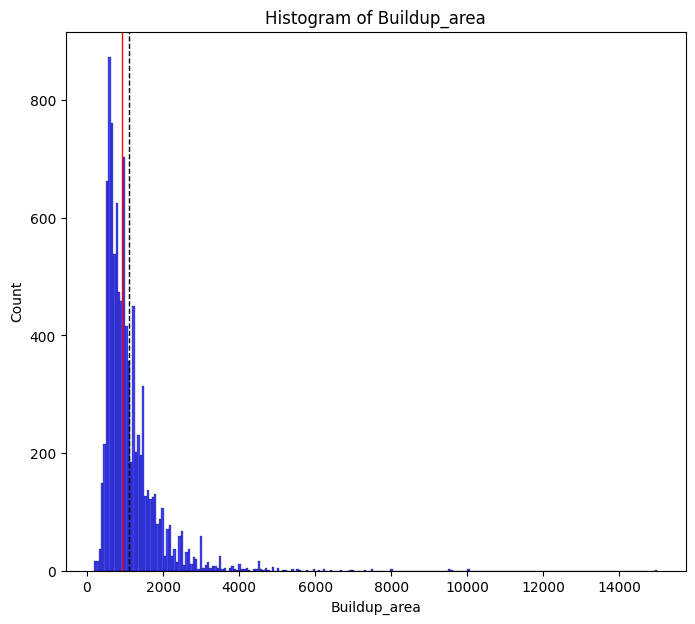



Mean value of Buildup_area : 1112.5418543740177
Median value of Buildup_area : 925.0
Min value of Buildup_area : 180.0
Max value of Buildup_area : 15000.0


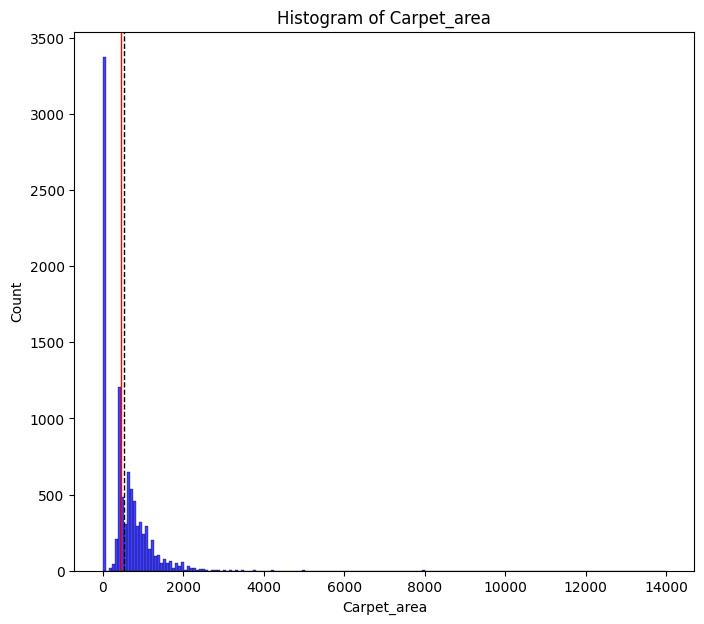



Mean value of Carpet_area : 535.4254583551598
Median value of Carpet_area : 450.0
Min value of Carpet_area : 1.0
Max value of Carpet_area : 14000.0


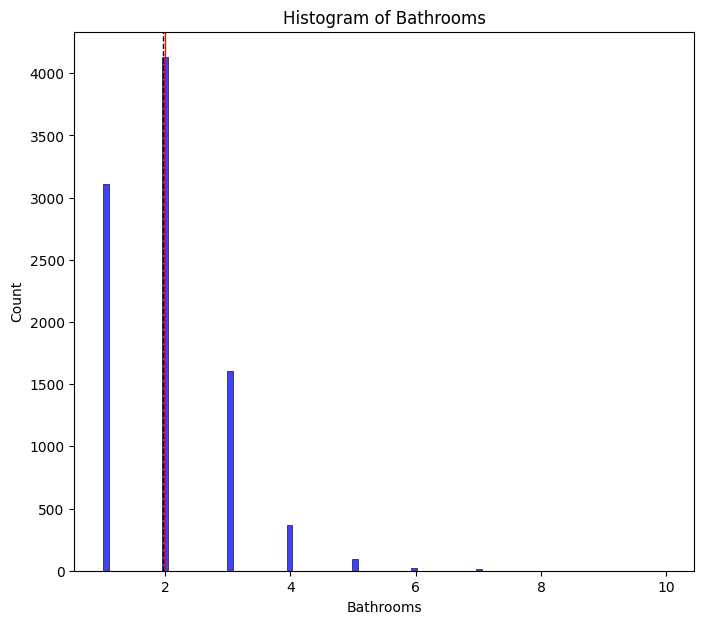



Mean value of Bathrooms : 1.9651038321558554
Median value of Bathrooms : 2.0
Min value of Bathrooms : 1.0
Max value of Bathrooms : 10.0


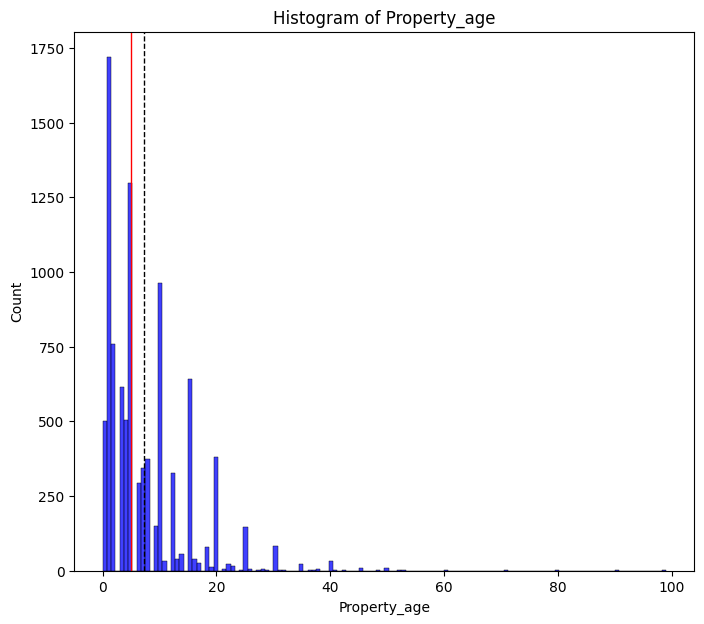



Mean value of Property_age : 7.246804944479363
Median value of Property_age : 5.0
Min value of Property_age : 0
Max value of Property_age : 99


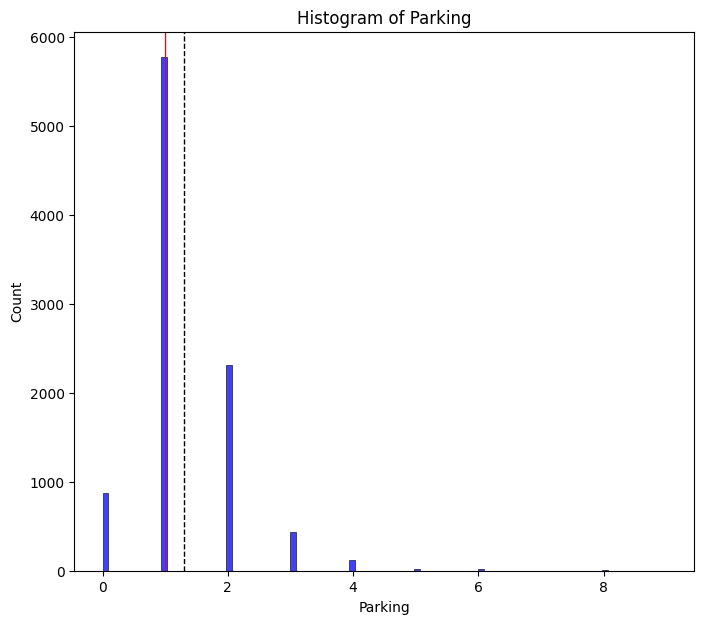



Mean value of Parking : 1.302325581395349
Median value of Parking : 1.0
Min value of Parking : 0
Max value of Parking : 9


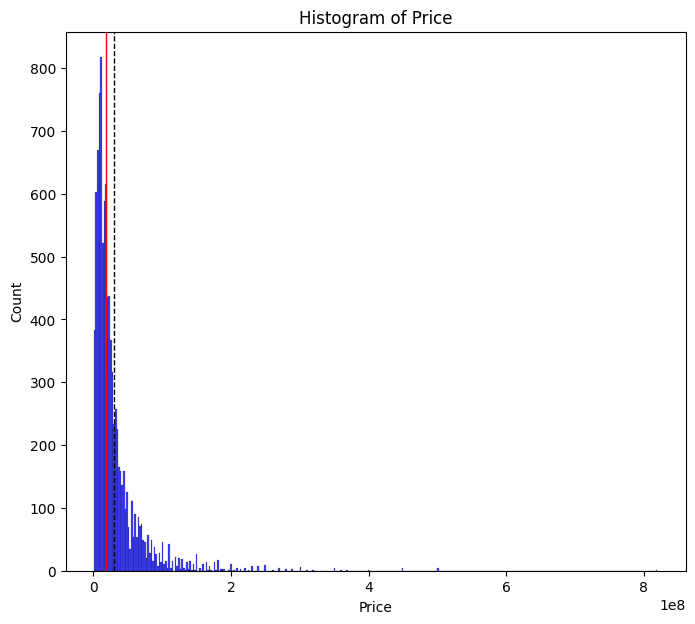



Mean value of Price : 30533182.380054474
Median value of Price : 19000000.0
Min value of Price : 780000.0
Max value of Price : 820000000.0


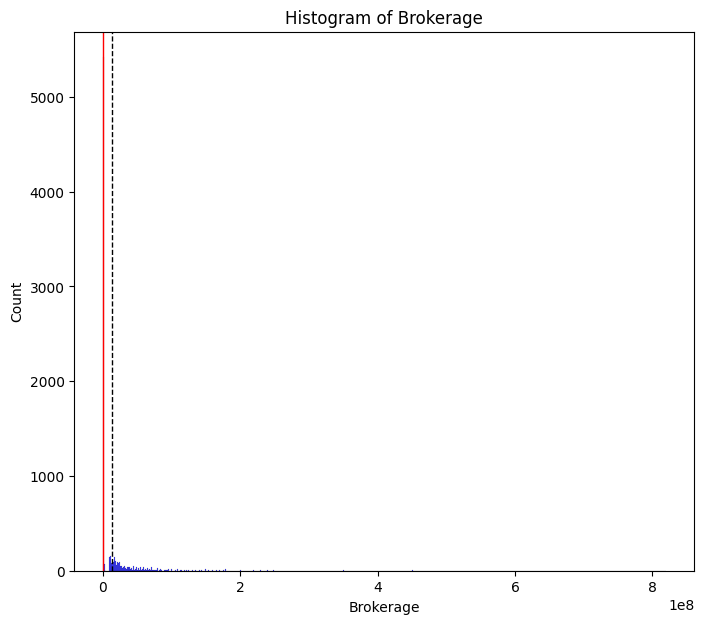



Mean value of Brokerage : 13726389.008287646
Median value of Brokerage : 290000.0
Min value of Brokerage : 0.0
Max value of Brokerage : 820000000.0


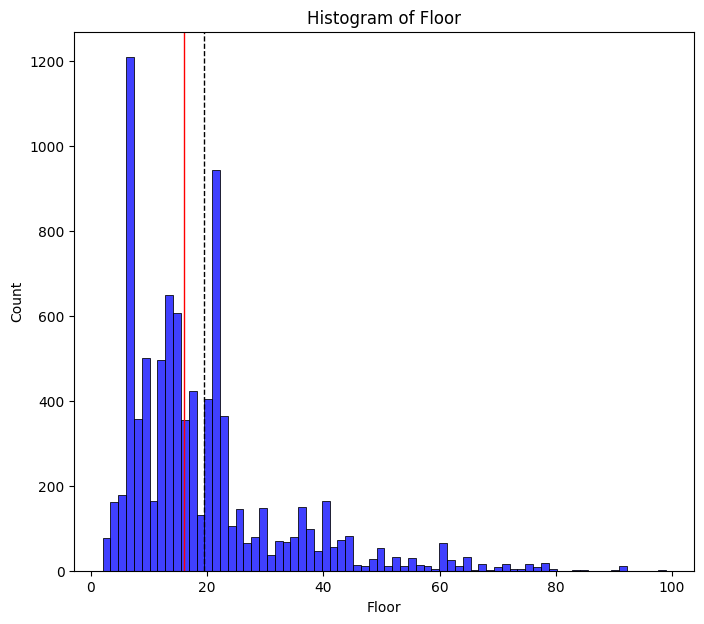



Mean value of Floor : 19.454067948144836
Median value of Floor : 16.0
Min value of Floor : 2.0
Max value of Floor : 99.0


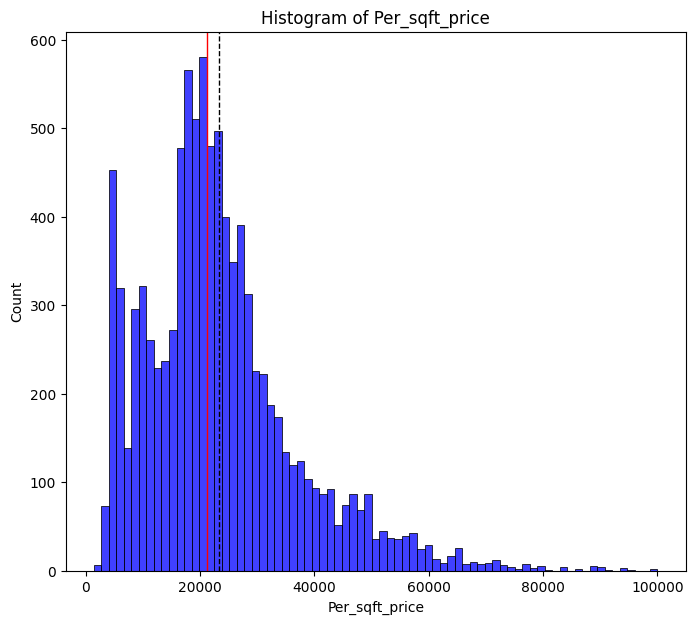



Mean value of Per_sqft_price : 23382.48742138365
Median value of Per_sqft_price : 21250.0
Min value of Per_sqft_price : 1440.0
Max value of Per_sqft_price : 100000.0


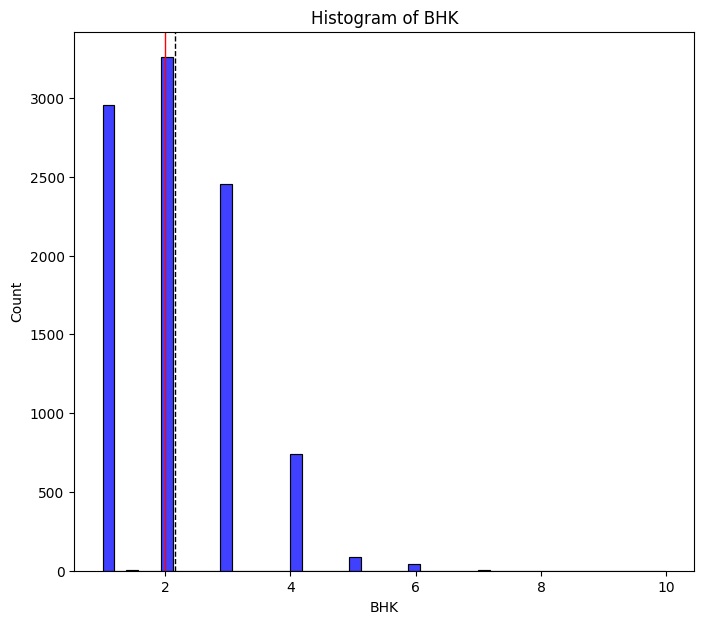



Mean value of BHK : 2.1502723653886444
Median value of BHK : 2.0
Min value of BHK : 1.0
Max value of BHK : 10.0


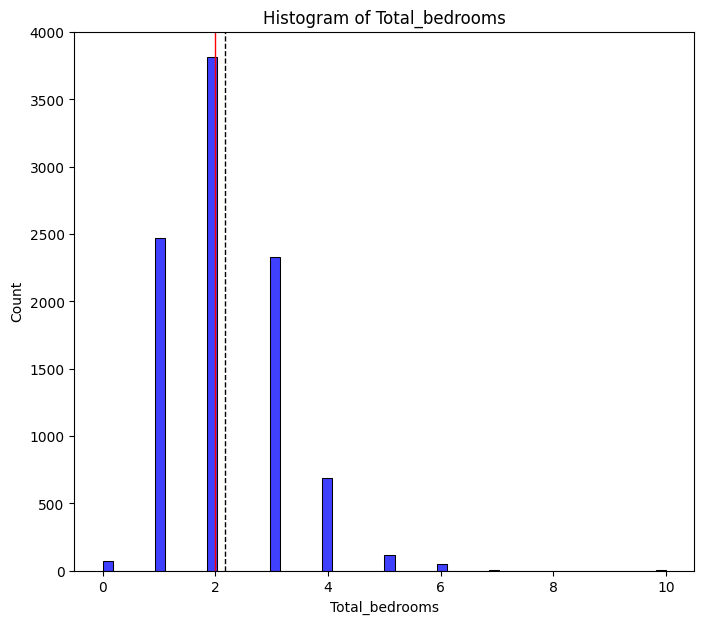



Mean value of Total_bedrooms : 2.175256652000838
Median value of Total_bedrooms : 2.0
Min value of Total_bedrooms : 0
Max value of Total_bedrooms : 10


In [96]:
## Creating the for loop .
for i in num_columns.columns :
  plt.figure(figsize=(8,7))
  sns.histplot(data=num_columns,x=i,color='blue')
  plt.axvline(x=num_columns[i].mean(),linewidth=1,linestyle='dashed',color='black')
  plt.axvline(x=num_columns[i].median(),linewidth=1,linestyle='solid',color='red')
  plt.title(f'Histogram of {i}')
  plt.show() ## show will show all the visuals .
  print("\n")
  print(f"Mean value of {i} :", num_columns[i].mean())
  print(f"Median value of {i} :", num_columns[i].median())
  print(f"Min value of {i} :", num_columns[i].min())
  print(f"Max value of {i} :", num_columns[i].max())

Per_sqft_price,Floor,Brokerage,Price,Carpet_area and Buildup_area are highly right skewed with a long tail towards positive direction .

In [97]:
cat_columns=new_flat[['Address','Possesion','Furnishing','Project_name']]
cat_columns.head()

,Address,Possesion,Furnishing,Project_name
index,,,,
1,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",Ready to move,Fully Furnished,Runwal Forest Tower 5 To 8
2,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",Ready to move,Unfurnished,Ananta Vardhman Nagar
3,"JP North Barcelona, Kashimira, Mira Road East,...",Ready to move,Semi Furnished,JP North Barcelona
4,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",Ready to move,Semi Furnished,Chandak Nischay
5,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",Ready to move,Semi Furnished,Neelam Solstice Phase I


In [98]:
## Using filter method to fetch the matching rows .
Zero_carpet=num_columns[num_columns.Carpet_area<=10]
Zero_carpet.shape

(3371, 11)

In [99]:
print("Median Buildup area in the overall data :",num_columns['Buildup_area'].median())
print("Median Buildup area of house when the carpet area is less than 10 :",Zero_carpet['Buildup_area'].median())

Median Buildup area in the overall data : 925.0
Median Buildup area of house when the carpet area is less than 10 : 900.0


In [100]:
print("Median Price of houses in overall data :", num_columns['Price'].median())
print("Median Price of houses when the carpet area is less than 10 :",Zero_carpet['Price'].median())

Median Price of houses in overall data : 19000000.0
Median Price of houses when the carpet area is less than 10 : 20500000.0


There is no such difference with main dataset in terms of median Price and Buildup_area when the carpet_area is less than 10 . So it is clearly visible that these are wrong values . any house or apartments carpet area can't be less than 10 so we need to replace these values .

In [101]:
## Converting these rows into null which are excedding a certain margin .
num_columns.Carpet_area[num_columns.Carpet_area<=10]=np.nan

<ipython-input-101-50b1a9a2dce1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_columns.Carpet_area[num_columns.Carpet_area<=10]=np.nan


In [102]:
num_columns.isnull().sum() ## isnull().sum() will show us the total no of null values in each column .

Buildup_area         1
Carpet_area       3372
Bathrooms          204
Property_age         0
Parking              0
Price                0
Brokerage         1703
Floor              598
Per_sqft_price       6
BHK                  0
Total_bedrooms       0
dtype: int64

In [103]:
## Using filter method to fetch the matching rows .
Zero_bedrooms=num_columns[num_columns.Total_bedrooms<1]
Zero_bedrooms.shape

(74, 11)

In [104]:
## Converting these rows into null which are excedding a certain margin .
num_columns.Total_bedrooms[num_columns.Total_bedrooms<1]=np.nan

<ipython-input-104-d222694d1983>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_columns.Total_bedrooms[num_columns.Total_bedrooms<1]=np.nan


Any house or apartment can't have 0 bedrooms so we need to replace these values .

In [105]:
## Creating a for loop with isnull().sum() function to see the percentage of null values in each column .
for i in num_columns.columns :
  print(f"Percentage of null values in {i} :", (num_columns[i].isnull().sum()*100)/len(num_columns[i]))

Percentage of null values in Buildup_area : 0.010475591870940708
Percentage of null values in Carpet_area : 35.32369578881207
Percentage of null values in Bathrooms : 2.1370207416719045
Percentage of null values in Property_age : 0.0
Percentage of null values in Parking : 0.0
Percentage of null values in Price : 0.0
Percentage of null values in Brokerage : 17.839932956212024
Percentage of null values in Floor : 6.264403938822544
Percentage of null values in Per_sqft_price : 0.06285355122564425
Percentage of null values in BHK : 0.0
Percentage of null values in Total_bedrooms : 0.7751937984496124


**Imputing missing or null values :**

This dataset has too many missing values and some null values too . So if we only drop those rows then most of the datapoints will be wiped off . That is why i have imputed all the missing and null values by using KNN imputer .

In [108]:
pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.8 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=445395aa0b2274fbf8819d1504df7db992824987840413f16479faa129de46a6
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11331 sha256=378de33f9e3becc3264de19851691d96322ed22fef8f42132213712c094be96b
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [109]:
from fancyimpute import KNN
Knn=KNN(k=5) ## k=5 means it will look for 5 closest neighbors .
num_columns.iloc[:,:]=Knn.fit_transform(num_columns)

Imputing row 1/9546 with 0 missing, elapsed time: 40.064
Imputing row 101/9546 with 1 missing, elapsed time: 40.068
Imputing row 201/9546 with 1 missing, elapsed time: 40.072
Imputing row 301/9546 with 0 missing, elapsed time: 40.076
Imputing row 401/9546 with 1 missing, elapsed time: 40.080
Imputing row 501/9546 with 1 missing, elapsed time: 40.084
Imputing row 601/9546 with 0 missing, elapsed time: 40.088
Imputing row 701/9546 with 1 missing, elapsed time: 40.093
Imputing row 801/9546 with 0 missing, elapsed time: 40.098
Imputing row 901/9546 with 1 missing, elapsed time: 40.103
Imputing row 1001/9546 with 1 missing, elapsed time: 40.106
Imputing row 1101/9546 with 1 missing, elapsed time: 40.111
Imputing row 1201/9546 with 0 missing, elapsed time: 40.114
Imputing row 1301/9546 with 2 missing, elapsed time: 40.117
Imputing row 1401/9546 with 0 missing, elapsed time: 40.122
Imputing row 1501/9546 with 1 missing, elapsed time: 40.127
Imputing row 1601/9546 with 0 missing, elapsed time:

In [110]:
num_columns.isnull().sum() ## isnull().sum() will show us the total no of null values in each column .

Buildup_area      0
Carpet_area       0
Bathrooms         0
Property_age      0
Parking           0
Price             0
Brokerage         0
Floor             0
Per_sqft_price    0
BHK               0
Total_bedrooms    0
dtype: int64

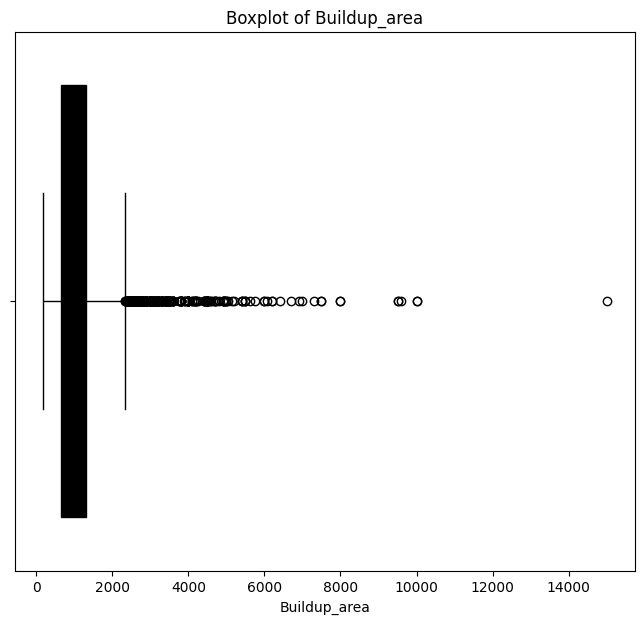



Skewness of Buildup_area : 3.9215449686534884
Value of mean+3 sd in positive side of Buildup_area : 3289.8949958591006


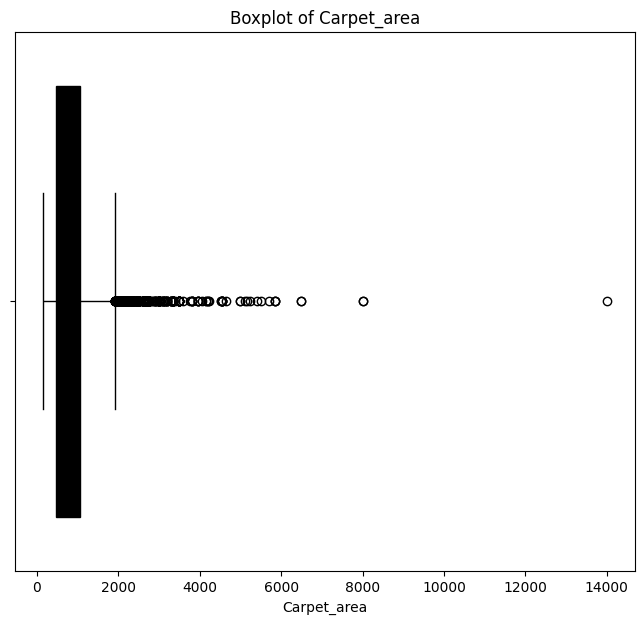



Skewness of Carpet_area : 4.010481385876384
Value of mean+3 sd in positive side of Carpet_area : 2586.6969912637774


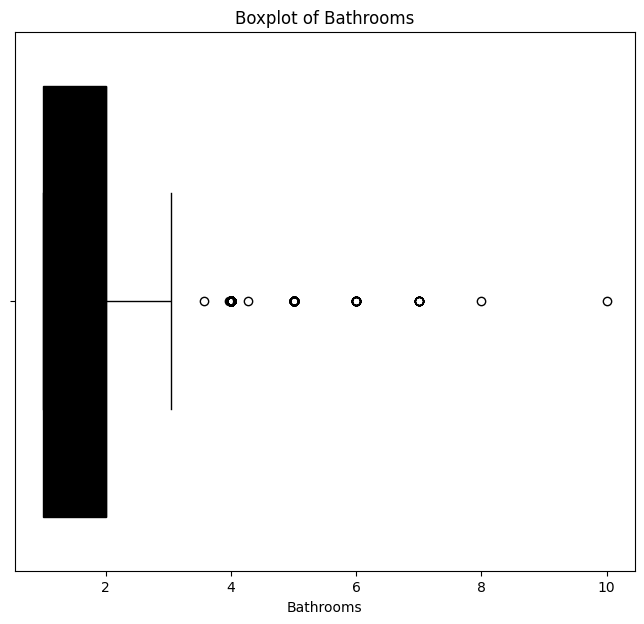



Skewness of Bathrooms : 1.1823254312564513
Value of mean+3 sd in positive side of Bathrooms : 4.680955582047193


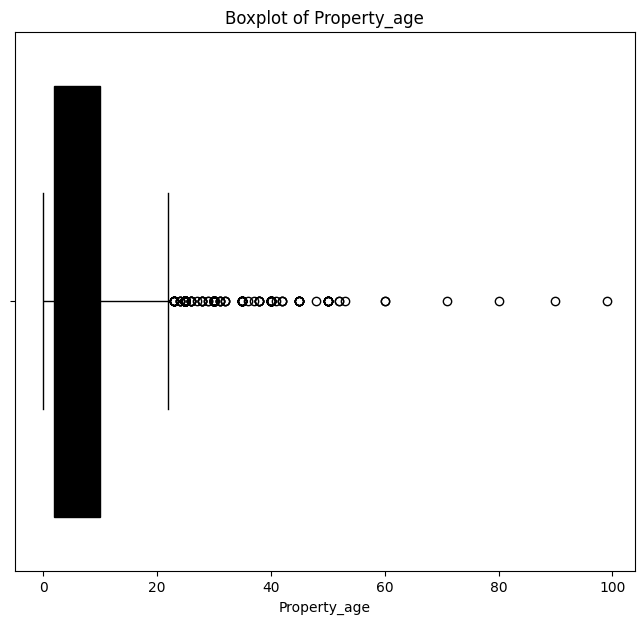



Skewness of Property_age : 2.258353379953544
Value of mean+3 sd in positive side of Property_age : 29.307701537950628


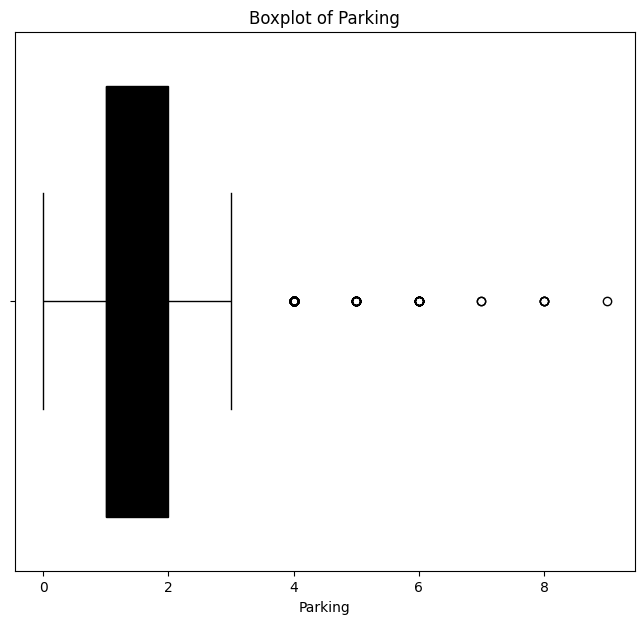



Skewness of Parking : 1.589346514294334
Value of mean+3 sd in positive side of Parking : 3.7220237592159355


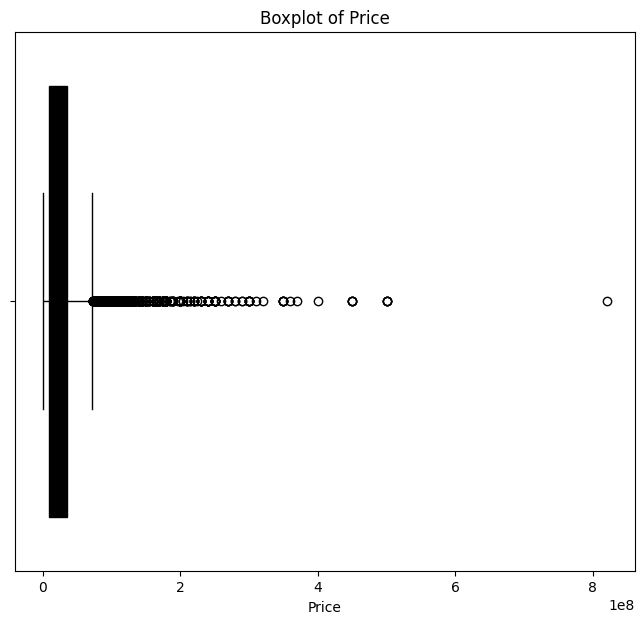



Skewness of Price : 4.88049742995554
Value of mean+3 sd in positive side of Price : 145969806.3126796


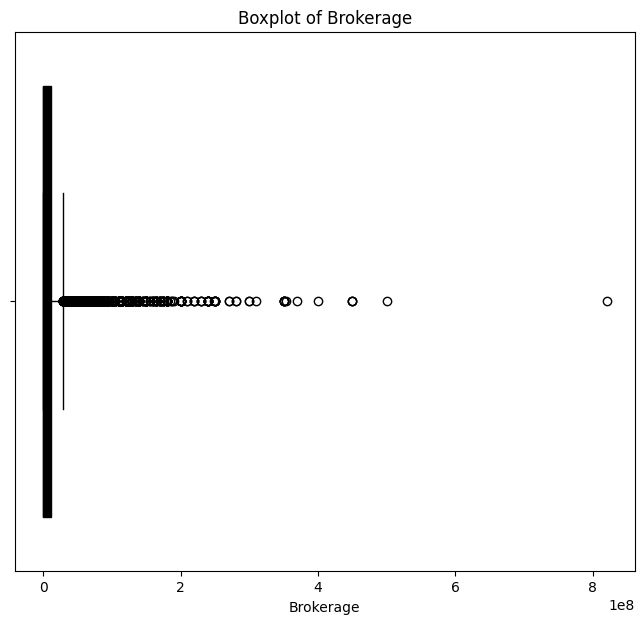



Skewness of Brokerage : 6.4429715128989455
Value of mean+3 sd in positive side of Brokerage : 110893792.34088781


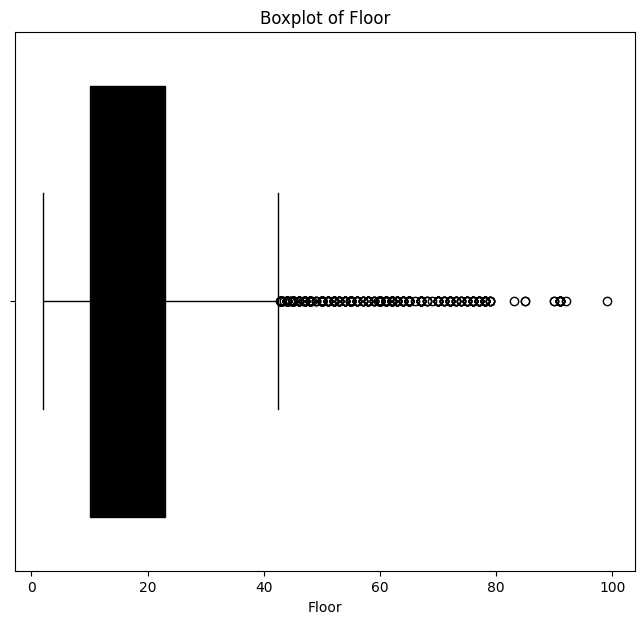



Skewness of Floor : 1.8069058702234453
Value of mean+3 sd in positive side of Floor : 59.77082198473637


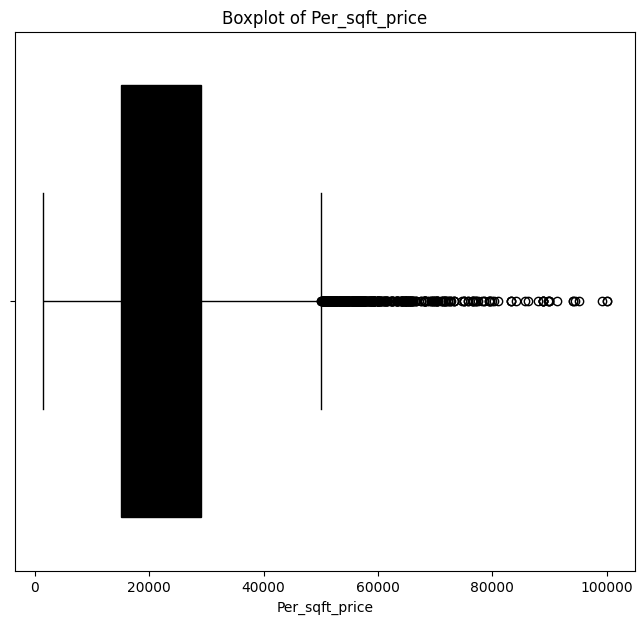



Skewness of Per_sqft_price : 1.2425359935006584
Value of mean+3 sd in positive side of Per_sqft_price : 63917.67971728777


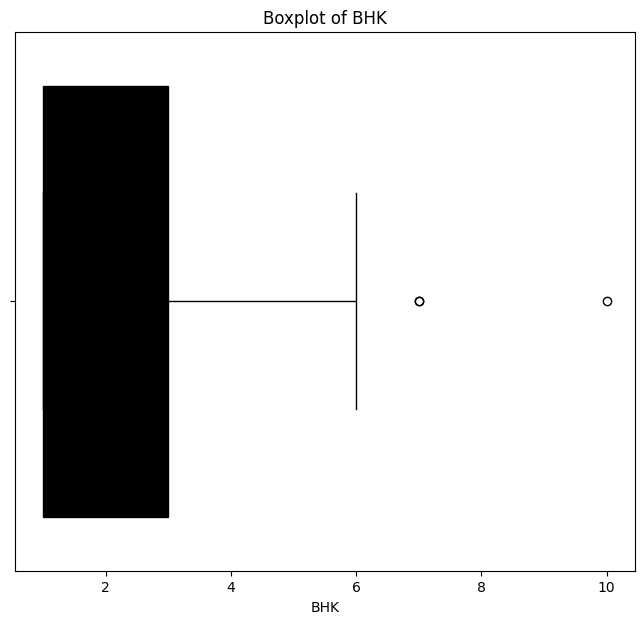



Skewness of BHK : 0.6991434543267564
Value of mean+3 sd in positive side of BHK : 5.181879197060365


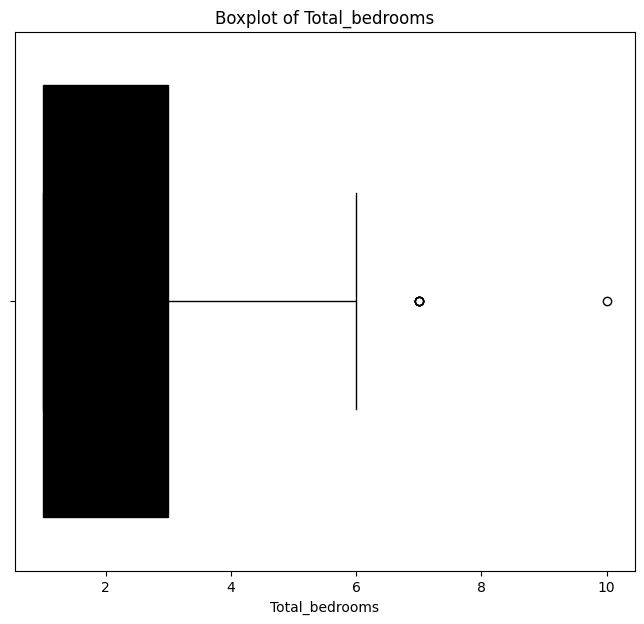



Skewness of Total_bedrooms : 0.8117680931014883
Value of mean+3 sd in positive side of Total_bedrooms : 5.152999686700893


In [111]:
## Creating the for loop .
for i in num_columns.columns :
  plt.figure(figsize=(8,7))
  sns.boxplot(data=num_columns,x=i,color='black')
  plt.title(f"Boxplot of {i}")
  plt.show()
  print("\n")
  print(f"Skewness of {i} :", num_columns[i].skew())
  print(f"Value of mean+3 sd in positive side of {i} :", num_columns[i].mean()+3*(num_columns[i].std()))

Out of all these columns some columns are very highly skewed with a lot of outliers . Brokerage,Price,Carpet_area,Buildup_area has the highest amount of skewness .

In [112]:
## Using filter method to fetch the matching rows .
old_property=num_columns[num_columns.Property_age>18]
print(old_property.shape)
new_property=num_columns[num_columns.Property_age<=2]
print(new_property.shape)

(789, 11)
(2977, 11)


In [113]:
print("Median Price of Old properties :", old_property.Price.median())
print("Median Price of New properties :", new_property.Price.median())

Median Price of Old properties : 21500000.0
Median Price of New properties : 18000000.0


In [114]:
## Using filter method to fetch the matching rows .
High_rise=num_columns[num_columns.Floor>30]
print(High_rise.shape)
Low_rise=num_columns[num_columns.Floor<=7]
print(Low_rise.shape)

(1473, 11)
(1641, 11)


In [115]:
print("Median Price of High rise houses :", High_rise.Price.median())
print("Median Price of Lower floors houses :", Low_rise.Price.median())

Median Price of High rise houses : 38000000.0
Median Price of Lower floors houses : 11000000.0


In [116]:
## Using filter method to fetch the matching rows .
Zero_brokerage=num_columns[num_columns.Brokerage==0]
Zero_brokerage.shape

(873, 11)

In [117]:
print("Median Price houses in overall data :", num_columns.Price.median())
print("Median Price of houses where the brokerage is zero :", Zero_brokerage.Price.median())

Median Price houses in overall data : 19000000.0
Median Price of houses where the brokerage is zero : 11000000.0


Data analysis :    

1. Median Price of Old properties are slightly higher than Properties which are equals to or lower than 2 years .

2. Median Price of high rise flats or apartments are way higher than normal lower floor flats . Median price of a high rise flat is - 38000000.0

3. Zero brokerage flats or properties are cheaper than other properties .

In [118]:
## Using pd.concat to join two dataframes and make it one .
flat_new=pd.concat([cat_columns,num_columns],axis=1)
flat_new.head()

,Address,Possesion,Furnishing,Project_name,Buildup_area,Carpet_area,Bathrooms,Property_age,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
index,,,,,,,,,,,,,,,
1,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",Ready to move,Fully Furnished,Runwal Forest Tower 5 To 8,1550.0,1130.0,2.0,3,2,39500000.0,400000.0,50.0,25480.0,3.0,3.0
2,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",Ready to move,Unfurnished,Ananta Vardhman Nagar,630.0,390.0,1.0,3,1,1900000.0,0.0,4.0,3020.0,1.0,1.0
3,"JP North Barcelona, Kashimira, Mira Road East,...",Ready to move,Semi Furnished,JP North Barcelona,580.0,475.0,2.0,1,0,7300000.0,150000.0,25.0,12590.0,1.0,1.0
4,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",Ready to move,Semi Furnished,Chandak Nischay,410.0,368.0,2.0,1,2,11000000.0,110000.0,35.0,26830.0,1.0,1.0
5,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",Ready to move,Semi Furnished,Neelam Solstice Phase I,1052.0,915.0,2.0,1,1,22500000.0,210000.0,26.0,21390.0,3.0,3.0


In [119]:
flat_new.shape

(9546, 15)

In [120]:
flat_new.isnull().sum() ## isnull().sum() will show us the total no of null values in each column .

Address              0
Possesion            0
Furnishing        1726
Project_name         0
Buildup_area         0
Carpet_area          0
Bathrooms            0
Property_age         0
Parking              0
Price                0
Brokerage            0
Floor                0
Per_sqft_price       0
BHK                  0
Total_bedrooms       0
dtype: int64

In [121]:
flat_new.info() ## info function will show total no of non null rows , datatypes of all the columns .

<class 'pandas.core.frame.DataFrame'>
Index: 9546 entries, 1 to 9546
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Address         9546 non-null   object 
 1   Possesion       9546 non-null   object 
 2   Furnishing      7820 non-null   object 
 3   Project_name    9546 non-null   object 
 4   Buildup_area    9546 non-null   float64
 5   Carpet_area     9546 non-null   float64
 6   Bathrooms       9546 non-null   float64
 7   Property_age    9546 non-null   int64  
 8   Parking         9546 non-null   int64  
 9   Price           9546 non-null   float64
 10  Brokerage       9546 non-null   float64
 11  Floor           9546 non-null   float64
 12  Per_sqft_price  9546 non-null   float64
 13  BHK             9546 non-null   float64
 14  Total_bedrooms  9546 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 1.2+ MB


In [122]:
possesion_status=flat_new.Possesion.value_counts()
fig=px.bar(possesion_status,y='count',width=650,height=600,
           title='barplot of Possesion')
fig.show()

Least number of South facing flats are present in the dataset .

In [123]:
Top_15_address=flat_new.Address.value_counts().head(15)
fig=px.bar(Top_15_address,y='count',width=1200,height=800,
           title='Top 15 Addresses')
fig.show()

In [124]:
flat_new=flat_new.drop(['Project_name'],axis=1)
flat_new.head()

,Address,Possesion,Furnishing,Buildup_area,Carpet_area,Bathrooms,Property_age,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
index,,,,,,,,,,,,,,
1,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",Ready to move,Fully Furnished,1550.0,1130.0,2.0,3,2,39500000.0,400000.0,50.0,25480.0,3.0,3.0
2,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",Ready to move,Unfurnished,630.0,390.0,1.0,3,1,1900000.0,0.0,4.0,3020.0,1.0,1.0
3,"JP North Barcelona, Kashimira, Mira Road East,...",Ready to move,Semi Furnished,580.0,475.0,2.0,1,0,7300000.0,150000.0,25.0,12590.0,1.0,1.0
4,"Chandak Nischay, Ambawadi, Dahisar East, Mumbai",Ready to move,Semi Furnished,410.0,368.0,2.0,1,2,11000000.0,110000.0,35.0,26830.0,1.0,1.0
5,"Neelam Solstice Phase I, Nalanda Nagar, Ramaba...",Ready to move,Semi Furnished,1052.0,915.0,2.0,1,1,22500000.0,210000.0,26.0,21390.0,3.0,3.0


In [125]:
## Value_counts() will show us total count of each distinct items in a column .
flat_new.Furnishing.value_counts()

Furnishing
Semi Furnished     3601
Unfurnished        3124
Fully Furnished    1095
Name: count, dtype: int64

In [126]:
## Using group by to group the data by preferred column .
Furnish_flat_price=flat_new[['Furnishing','Price']].groupby('Furnishing').median().sort_values('Price',ascending=False)
Furnish_flat_price

,Price
Furnishing,
Fully Furnished,25000000.0
Semi Furnished,19500000.0
Unfurnished,17500000.0


Fully furnished flats costs higher than Semi furnished and Unfurnished flats .

In [127]:
## Using group by to group the data by preferred column and then create a barplot to see the results more precisely .
Top_area_price=flat_new[['Address','Price']].groupby('Address').median().sort_values('Price',ascending=False).head(15)
Top_area_price

,Price
Address,
"Oberoi 360 West, Worli Shivaji Nagar, Worli, Mumbai",820000000.0
"khar west , Khar West, Mumbai",500000000.0
"Indiabulls Blu Tower C, BDD Chawls Worli, Worli, Mumbai",500000000.0
"Juhu Tara Road, Tagore Road, Santacruz West, Mumbai",450000000.0
"Lodha World Tower, Upper Worli, Worli, Mumbai",370000000.0
"Nargis Dutt Road, Bandra West, Mumbai",350000000.0
"Sunteck Signature Island, Bandra Kurla Complex, Bandra East, Mumbai",350000000.0
"CATER ROAD, Pali Hill, Bandra West, Mumbai",350000000.0
"Swaraj Homes Chhaya Society, Chembur, Mumbai",300000000.0


In [128]:
fig=px.bar(Top_area_price,y='Price',width=1250,height=850,
           title='Top 15 Places in mumbai and their median flat price')
fig.show()

Address and Price :

Oberoi 360 West, Worli Shivaji Nagar, Worli, Mumbai has the most costly flats and apartments with median price of 82 million ruppess .

In [129]:
## Using group by to group the data by preferred column and then create a barplot to see the results more precisely .
Possesion_price=flat_new[['Price','Possesion']].groupby('Possesion').median().sort_values('Price',ascending=False)
fig=px.bar(Possesion_price,y='Price',width=850,height=700,
           title='Flats possesions and their median flat price')
fig.show()

**Flat_possesion :**

1. North facing flats has the highest median price of 21 million ruppess .
2. South facing flats has the lowest median price of 9.22 million ruppess .

In [130]:
## Drooping some unnecessary columns with drop function .
flat_new=flat_new.drop(['Address'],axis=1)
flat_new.head()

,Possesion,Furnishing,Buildup_area,Carpet_area,Bathrooms,Property_age,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms
index,,,,,,,,,,,,,
1,Ready to move,Fully Furnished,1550.0,1130.0,2.0,3,2,39500000.0,400000.0,50.0,25480.0,3.0,3.0
2,Ready to move,Unfurnished,630.0,390.0,1.0,3,1,1900000.0,0.0,4.0,3020.0,1.0,1.0
3,Ready to move,Semi Furnished,580.0,475.0,2.0,1,0,7300000.0,150000.0,25.0,12590.0,1.0,1.0
4,Ready to move,Semi Furnished,410.0,368.0,2.0,1,2,11000000.0,110000.0,35.0,26830.0,1.0,1.0
5,Ready to move,Semi Furnished,1052.0,915.0,2.0,1,1,22500000.0,210000.0,26.0,21390.0,3.0,3.0


In [131]:
print(num_columns.shape)
print(flat_new.shape)

(9546, 11)
(9546, 13)


Heatmap :

Heatmap basically shows the correlation between all the columns . It also shows either the correlation is positive or negative .

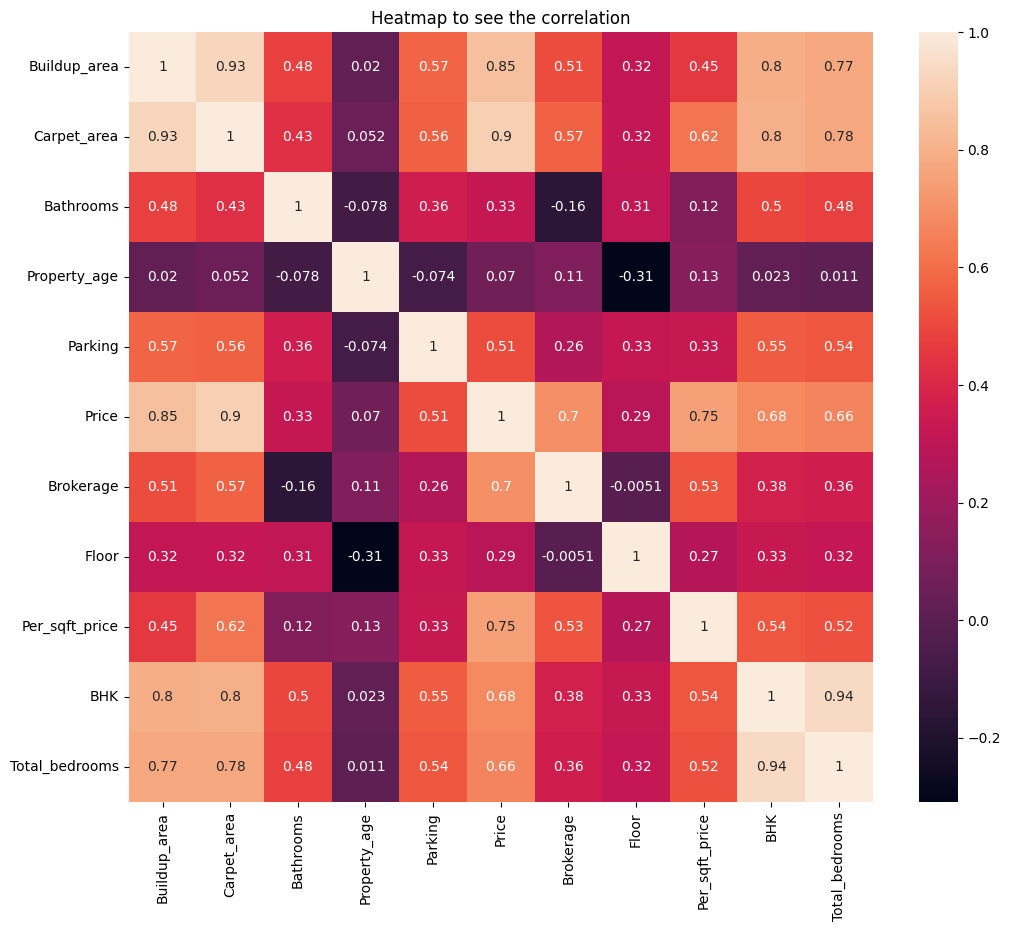

In [132]:
flat_corr=num_columns.corr() ## corr() is the correlation function .
plt.figure(figsize=(12,10))
sns.heatmap(data=flat_corr,annot=True,linecolor='blue')
plt.title("Heatmap to see the correlation")
plt.show()

Builup_area , Carpet_area has the highest positive correlation and Property_age has the lowest .

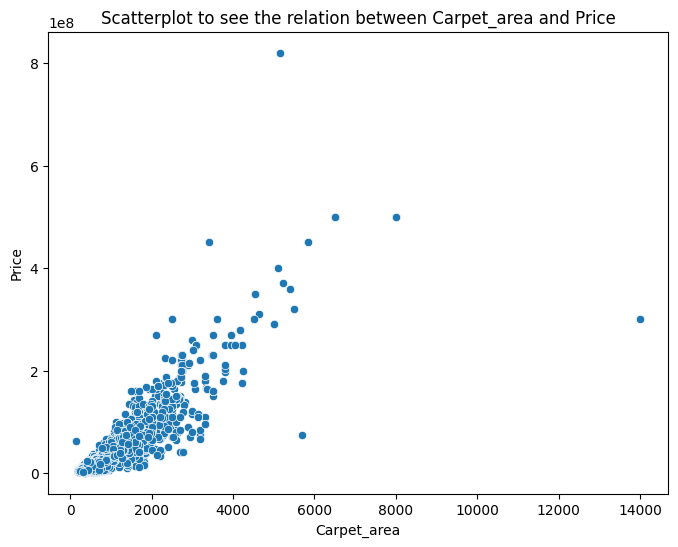

In [133]:
## Scatterplot to see the relation between the target variable and indipendent variable .
plt.figure(figsize=(8,6))
sns.scatterplot(data=flat_new,x='Carpet_area',y='Price')
plt.title("Scatterplot to see the relation between Carpet_area and Price")
plt.show()

Carpet_area and Price has a very strong positive relationship .

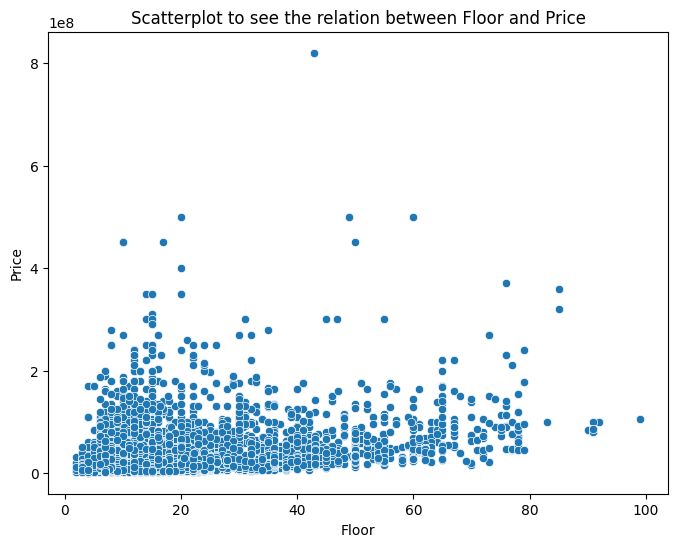

In [134]:
## Scatterplot to see the relation between the target variable and indipendent variable .
plt.figure(figsize=(8,6))
sns.scatterplot(data=flat_new,x='Floor',y='Price')
plt.title("Scatterplot to see the relation between Floor and Price")
plt.show()

Floor and Price has a positive relationship.

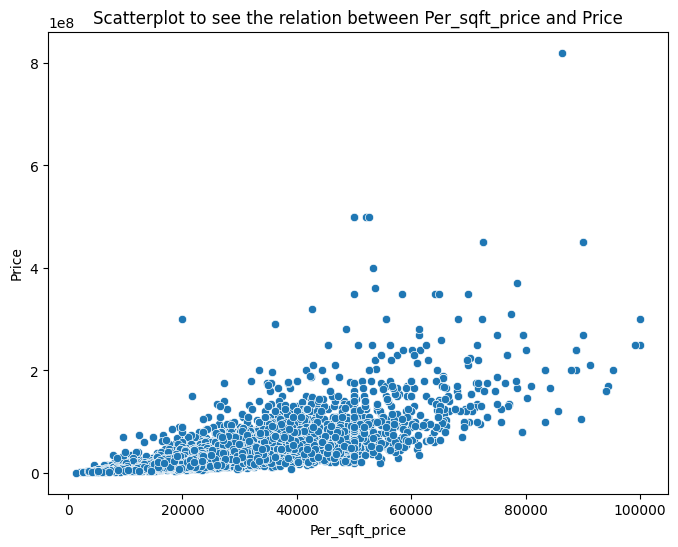

In [135]:
## Scatterplot to see the relation between the target variable and indipendent variable .
plt.figure(figsize=(8,6))
sns.scatterplot(data=flat_new,x='Per_sqft_price',y='Price')
plt.title("Scatterplot to see the relation between Per_sqft_price and Price")
plt.show()

Per_sqft_price and Price has a strong positive relationship .

In [136]:
## Using pd.get_dummies to convert two categorical columns into numeric ones .
flat_new=pd.get_dummies(flat_new,columns=['Possesion','Furnishing'],dtype=int)
flat_new.head()

,Buildup_area,Carpet_area,Bathrooms,Property_age,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms,Possesion_East facing,Possesion_North facing,Possesion_North-East facing,Possesion_Ready to move,Possesion_South facing,Possesion_West facing,Furnishing_Fully Furnished,Furnishing_Semi Furnished,Furnishing_Unfurnished
index,,,,,,,,,,,,,,,,,,,,
1,1550.0,1130.0,2.0,3,2,39500000.0,400000.0,50.0,25480.0,3.0,3.0,0,0,0,1,0,0,1,0,0
2,630.0,390.0,1.0,3,1,1900000.0,0.0,4.0,3020.0,1.0,1.0,0,0,0,1,0,0,0,0,1
3,580.0,475.0,2.0,1,0,7300000.0,150000.0,25.0,12590.0,1.0,1.0,0,0,0,1,0,0,0,1,0
4,410.0,368.0,2.0,1,2,11000000.0,110000.0,35.0,26830.0,1.0,1.0,0,0,0,1,0,0,0,1,0
5,1052.0,915.0,2.0,1,1,22500000.0,210000.0,26.0,21390.0,3.0,3.0,0,0,0,1,0,0,0,1,0


**Heatmap :**    

Heatmap basically shows the correlation between all the columns . It also shows either the correlation is positive or negative .

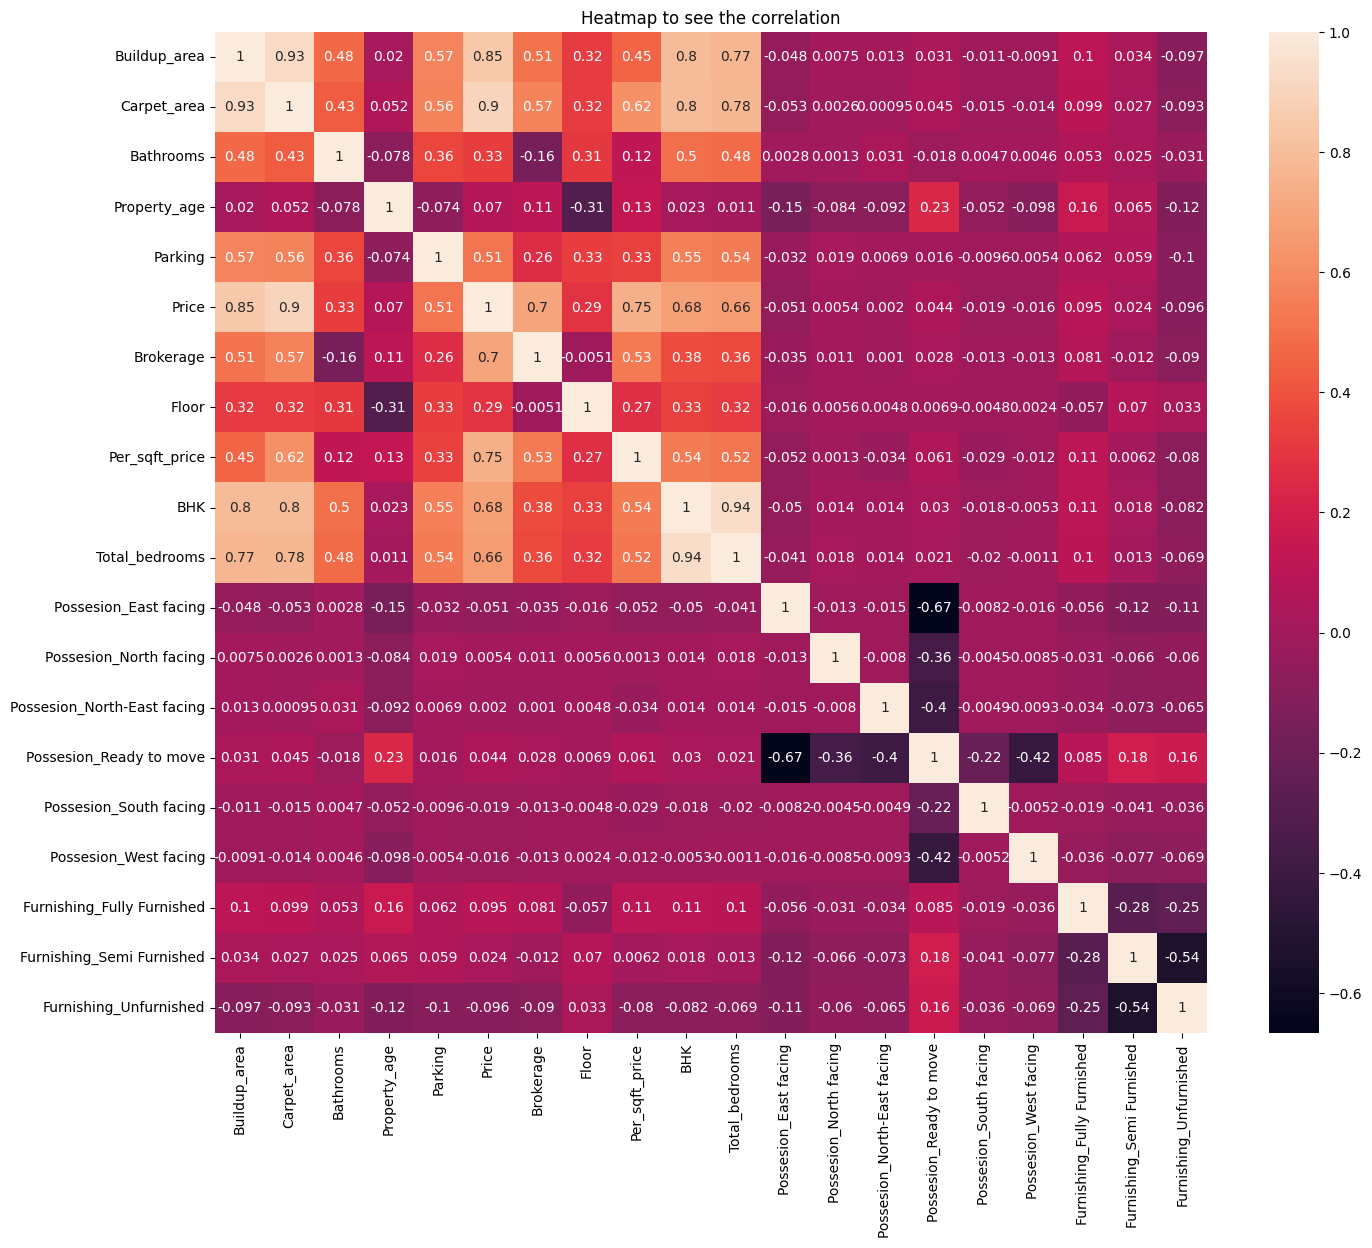

In [137]:
new_flat_corr=flat_new.corr() ## corr() is the correlation function .
plt.figure(figsize=(16,13))
sns.heatmap(data=new_flat_corr,annot=True,linecolor='red')
plt.title('Heatmap to see the correlation')
plt.show()

Buildup_area,Carpet_area,Per-sqft_price has the highest amount of positive correlation with Price . Columns with negative correlation or extremely little correlation has to dropped from the dataset .

In [138]:
flat_new.columns

Index(['Buildup_area', 'Carpet_area', 'Bathrooms', 'Property_age', 'Parking',
       'Price', 'Brokerage', 'Floor', 'Per_sqft_price', 'BHK',
       'Total_bedrooms', 'Possesion_East facing', 'Possesion_North facing',
       'Possesion_North-East facing', 'Possesion_Ready to move',
       'Possesion_South facing', 'Possesion_West facing',
       'Furnishing_Fully Furnished', 'Furnishing_Semi Furnished',
       'Furnishing_Unfurnished'],
      dtype='object')

Dropping these columns because they don't have a strong and positive relationship with the Target variable .

In [139]:
## Drooping some unnecessary columns with drop function .
flat_new=flat_new.drop(['Possesion_East facing','Possesion_North facing','Possesion_North-East facing',
       'Possesion_South facing', 'Possesion_West facing','Furnishing_Semi Furnished','Furnishing_Unfurnished'],axis=1)
flat_new.head()  ## head function will show us the top 5 rows .

,Buildup_area,Carpet_area,Bathrooms,Property_age,Parking,Price,Brokerage,Floor,Per_sqft_price,BHK,Total_bedrooms,Possesion_Ready to move,Furnishing_Fully Furnished
index,,,,,,,,,,,,,
1,1550.0,1130.0,2.0,3,2,39500000.0,400000.0,50.0,25480.0,3.0,3.0,1,1
2,630.0,390.0,1.0,3,1,1900000.0,0.0,4.0,3020.0,1.0,1.0,1,0
3,580.0,475.0,2.0,1,0,7300000.0,150000.0,25.0,12590.0,1.0,1.0,1,0
4,410.0,368.0,2.0,1,2,11000000.0,110000.0,35.0,26830.0,1.0,1.0,1,0
5,1052.0,915.0,2.0,1,1,22500000.0,210000.0,26.0,21390.0,3.0,3.0,1,0


Creating a for loop of boxplot after imputing all the null values to see the outliers , skewness and extreme outliers of all numerical columns .

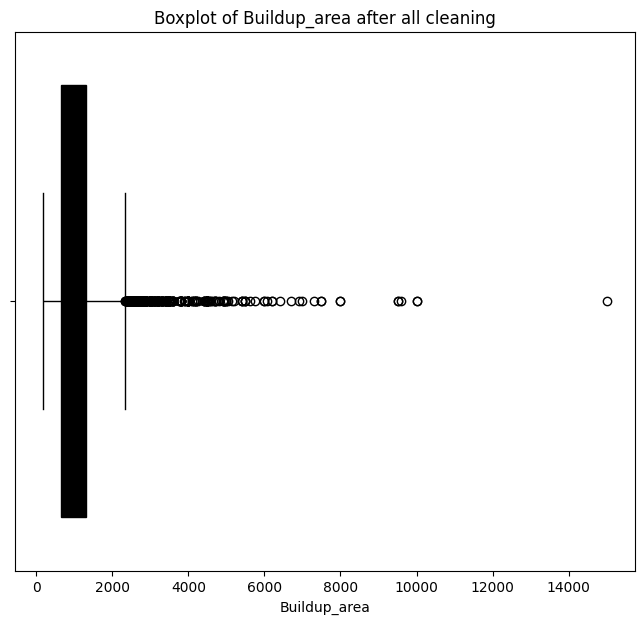



Skewness of Buildup_area : 3.9215449686534884
Value of mean+3 sd in positive side of Buildup_area : 3289.8949958591006


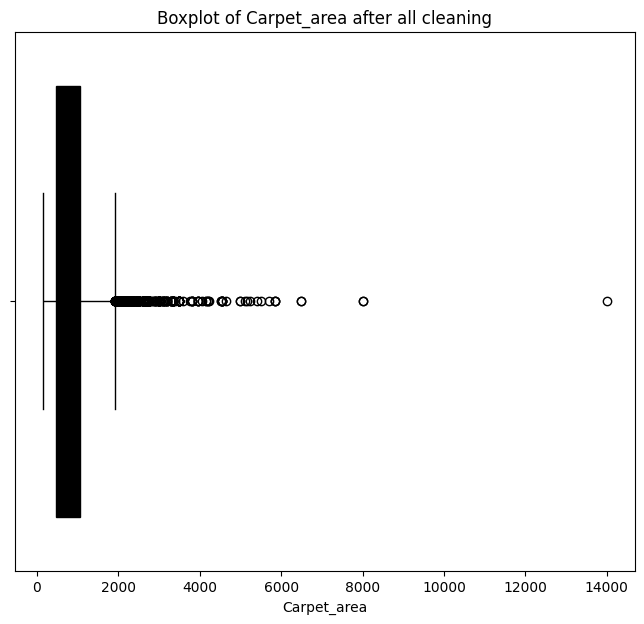



Skewness of Carpet_area : 4.010481385876384
Value of mean+3 sd in positive side of Carpet_area : 2586.6969912637774


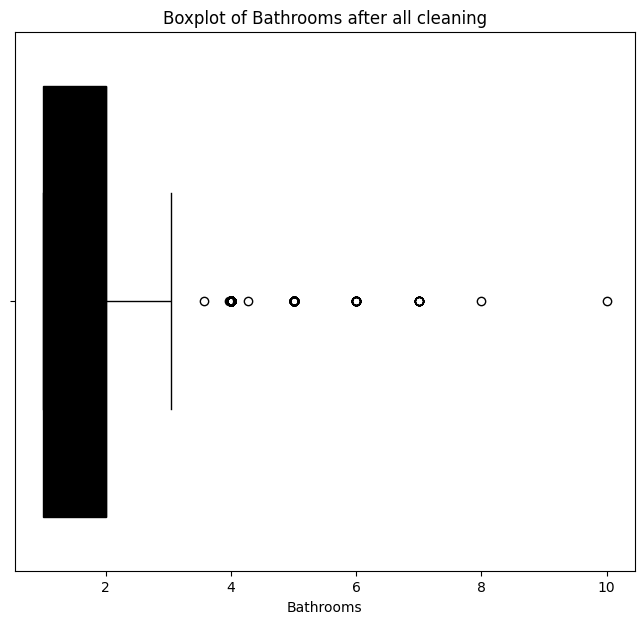



Skewness of Bathrooms : 1.1823254312564513
Value of mean+3 sd in positive side of Bathrooms : 4.680955582047193


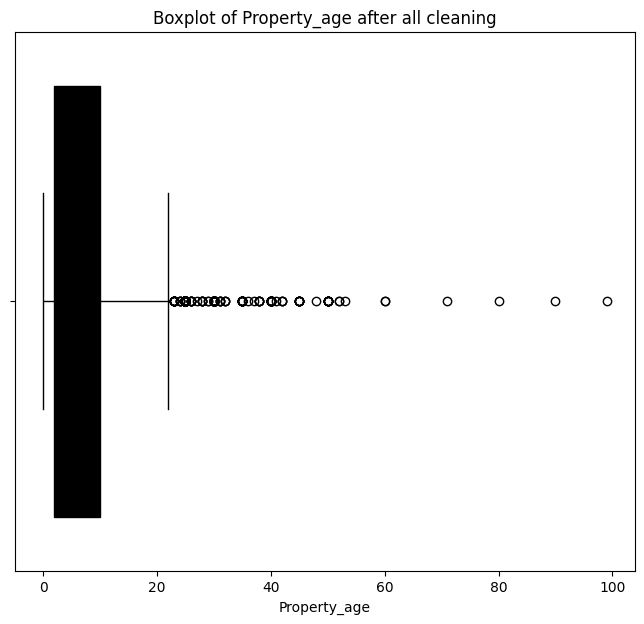



Skewness of Property_age : 2.258353379953544
Value of mean+3 sd in positive side of Property_age : 29.307701537950628


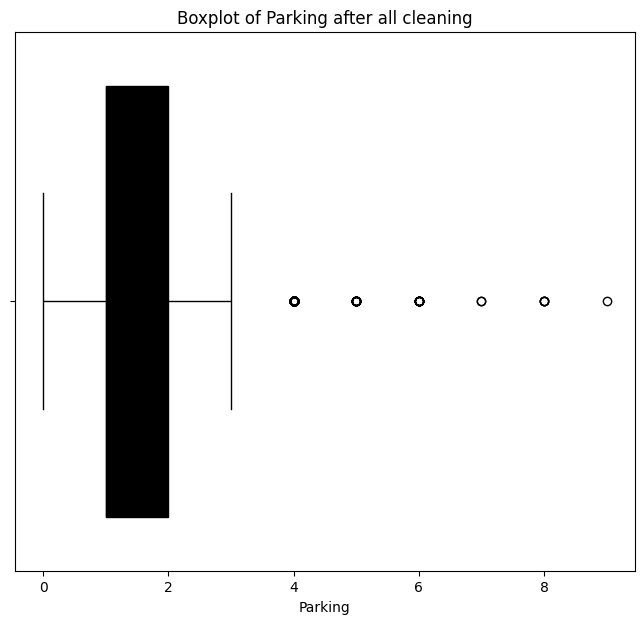



Skewness of Parking : 1.589346514294334
Value of mean+3 sd in positive side of Parking : 3.7220237592159355


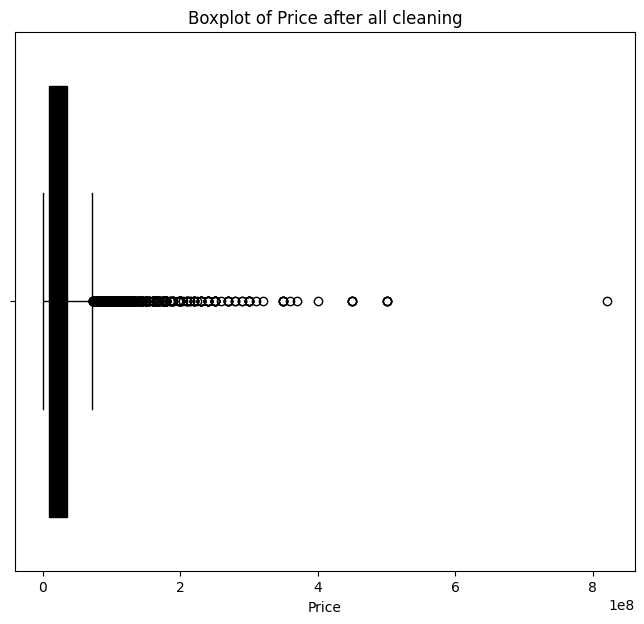



Skewness of Price : 4.88049742995554
Value of mean+3 sd in positive side of Price : 145969806.3126796


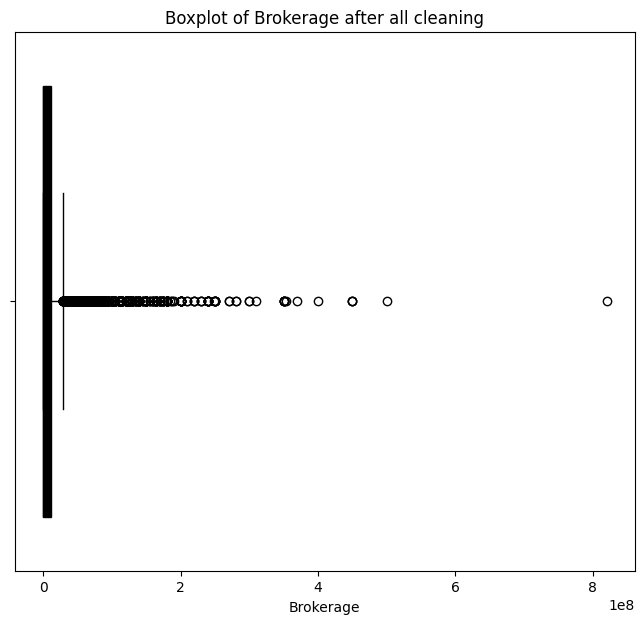



Skewness of Brokerage : 6.4429715128989455
Value of mean+3 sd in positive side of Brokerage : 110893792.34088781


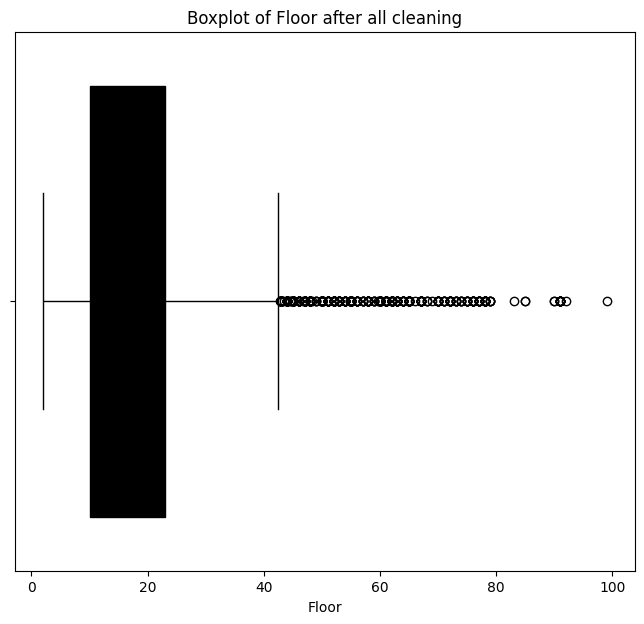



Skewness of Floor : 1.8069058702234453
Value of mean+3 sd in positive side of Floor : 59.77082198473637


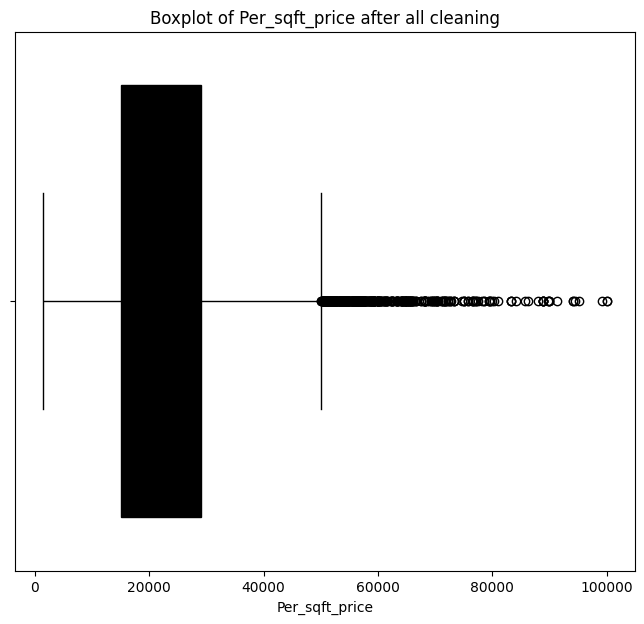



Skewness of Per_sqft_price : 1.2425359935006584
Value of mean+3 sd in positive side of Per_sqft_price : 63917.67971728777


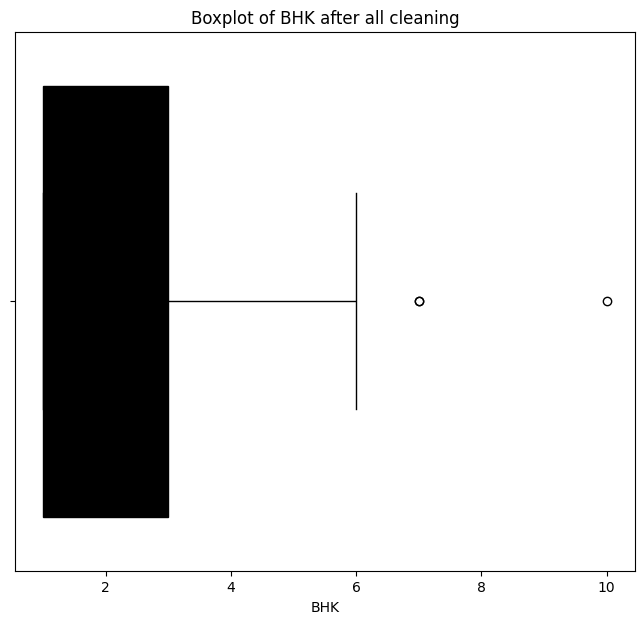



Skewness of BHK : 0.6991434543267564
Value of mean+3 sd in positive side of BHK : 5.181879197060365


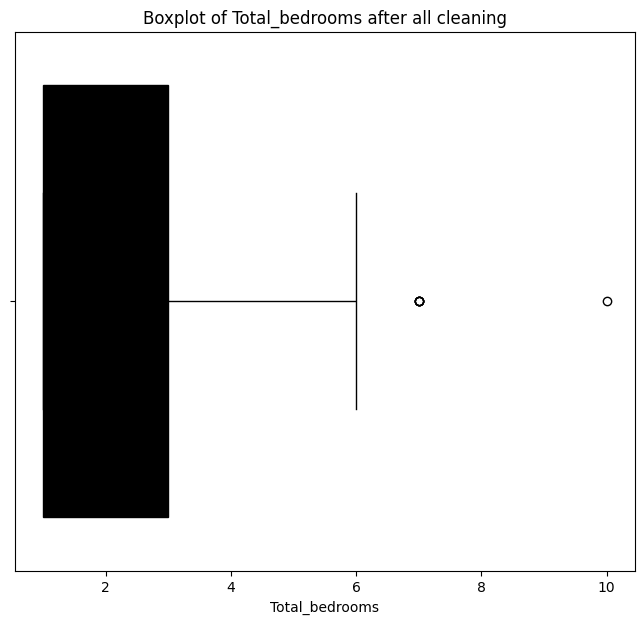



Skewness of Total_bedrooms : 0.8117680931014883
Value of mean+3 sd in positive side of Total_bedrooms : 5.152999686700893


In [140]:
## Creating the for loop .
for i in num_columns.columns :
  plt.figure(figsize=(8,7))
  sns.boxplot(data=num_columns,x=i,color='black')
  plt.title(f"Boxplot of {i} after all cleaning")
  plt.show()
  print("\n")
  print(f"Skewness of {i} :", num_columns[i].skew())
  print(f"Value of mean+3 sd in positive side of {i} :", num_columns[i].mean()+3*(num_columns[i].std()))

Analysis after boxplot :     

Out of all these columns some columns are very highly skewed with a lot of outliers . Brokerage,Price,Carpet_area,Buildup_area has the highest amount of skewness .

In normal distribution 99.7% datapoints fall under mean-3sd to mean+3sd .
If we look out for outliers (q3+1.5*iqr) then soo many datapoints have to be removed .

That's why i have used mean+3sd method to filter outliers . datapoints which are excedding this margin will be converted into null or nan and then get dropped . this will make our data less skewed , which is perfect for predictive analysis .

In [141]:
## Converting these rows into null which are excedding a certain margin in each mentioned column .
flat_new.Per_sqft_price[flat_new.Per_sqft_price>=65000]=np.nan
flat_new.Brokerage[flat_new.Brokerage>=120000000]=np.nan
flat_new.Price[flat_new.Price>150000000]=np.nan
flat_new.Property_age[flat_new.Property_age>=40]=np.nan
flat_new.Carpet_area[flat_new.Carpet_area>=2750]=np.nan
flat_new.Buildup_area[flat_new.Buildup_area>=3750]=np.nan

<ipython-input-141-4958cbf761f1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-141-4958cbf761f1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-141-4958cbf761f1>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-141-4958cbf761f1>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [142]:
flat_new.isnull().sum()

Buildup_area                  105
Carpet_area                   109
Bathrooms                       0
Property_age                   66
Parking                         0
Price                         163
Brokerage                     180
Floor                           0
Per_sqft_price                116
BHK                             0
Total_bedrooms                  0
Possesion_Ready to move         0
Furnishing_Fully Furnished      0
dtype: int64

In [143]:
## dropna function will drop all the null or nan datapoints .
flat_new=flat_new.dropna()
print("Size after removing extreme outliers :", flat_new.shape)

Size after removing extreme outliers : (9178, 13)


In [144]:
flat_new.isnull().sum()

Buildup_area                  0
Carpet_area                   0
Bathrooms                     0
Property_age                  0
Parking                       0
Price                         0
Brokerage                     0
Floor                         0
Per_sqft_price                0
BHK                           0
Total_bedrooms                0
Possesion_Ready to move       0
Furnishing_Fully Furnished    0
dtype: int64

In [145]:
flat_new.skew()

Buildup_area                  1.491330
Carpet_area                   1.329703
Bathrooms                     0.882353
Property_age                  1.392394
Parking                       1.305288
Price                         1.839721
Brokerage                     2.839636
Floor                         1.787747
Per_sqft_price                0.789999
BHK                           0.534913
Total_bedrooms                0.599214
Possesion_Ready to move      -3.950129
Furnishing_Fully Furnished    2.473134
dtype: float64

In [146]:
X=flat_new.drop(['Price'],axis=1) ## Creating X dataset for all the indipendent columns.
y=flat_new['Price'] ## y is our target variable .

train_test_split will split the dataset into training and testing .
  
  test_size=0.3 means 30% of datapoints will be kept for testing and others will be used for training .

In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=27)

In [148]:
print(X_train.shape)
print(y_test.shape)

(6424, 12)
(2754,)


In [149]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
SC_Xtrain=SC.fit_transform(X_train) ## Fitting and transforming our training data .
SC_Xtest=SC.transform(X_test) ## Only transforming our testing data .

In this project i have used 5 different ML algorithms to correctly predict the Flat Price . I have also tuned some of the algorithms to make it more robust and accurate.

Below i have mentioned all the algorithms and where i have used hyperparameter tuning.

**ML algorithms :**

1. Linear Regression
2. DecisionTreeRegressor
3. RandomForestRegressor
4. KNeighborsRegressor
5. xgboost (Hyperparameter tuning)

In the end i have compared all the algorithms to see which is giving us the least inaccuracy or least rmse .

In [150]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Evaluation_metrics in Regression :    

**1. r2_score** = r2_score basically shows how good the regression line fits or it can be described as an accuracy_score of Regression method .

**2. error :** After our algorithm predicts the outcome there are two datapoints one is original and one is predicted . the difference between the (original-predicted) can be described as an error . error can be positive or neagtive .

**3. mean_absolute_error :** mean_absolute_error sums up all the errors and then take the mean value of it by divide that by number of datapoints .

**4. mean_squraed_error :** In mean squared error it calculates the error and then square the error value . Then it sums up all the squared errors and divide that by number of observations or datapoints .

**5. rmse :** rmse stands for square root of mean_squared_error . rmse value is much closer or interpretable with the target variable .

In [151]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(SC_Xtrain,y_train)
LR_pred=LR.predict(SC_Xtest) ## Predicting the model with X_test .
LR_pred

array([11784035.55397997, 18545144.20824888, 22072211.94903137, ...,
       37896893.7859789 ,  2264745.58268176,  3149480.97400859])

In [152]:
print("r2 score of Linear Regression algorithm :", (r2_score(y_test,LR_pred))*100)
print("MAE of Linear Regression algorithm :", mean_absolute_error(y_test,LR_pred))
print("MSE of Linear Regression algorithm :", mean_squared_error(y_test,LR_pred))
print("RMSE or square root of MSE for Linear Regression algorithm :", np.sqrt(mean_squared_error(y_test,LR_pred)))

r2 score of Linear Regression algorithm : 94.83119459570307
MAE of Linear Regression algorithm : 3496633.314359878
MSE of Linear Regression algorithm : 26903707853850.992
RMSE or square root of MSE for Linear Regression algorithm : 5186878.430602648


In [153]:
print("10% of Target variable's mean :", (new_flat.Price.mean()*10)/100)

10% of Target variable's mean : 3053318.238005447


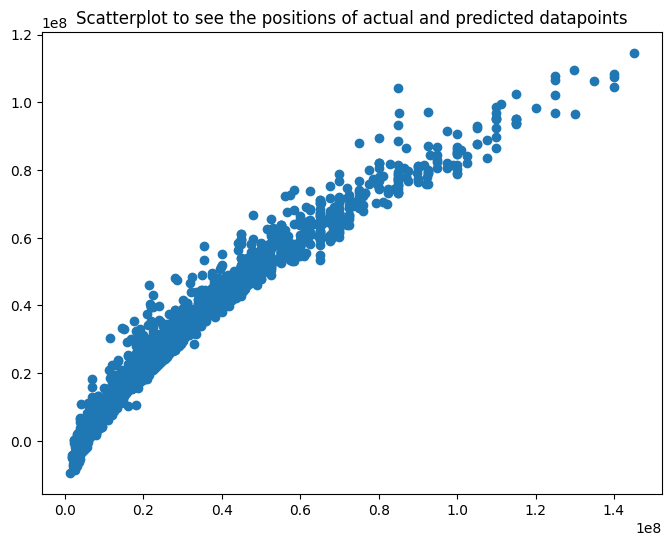

In [154]:
## Scatterplot to see the relation between original and predicted datapoints .
plt.figure(figsize=(8,6))
plt.scatter(y_test,LR_pred)
plt.title("Scatterplot to see the positions of actual and predicted datapoints")
plt.show()

Out of all algorithms in Logistic Regression the actual and predicted datapoints are little bit scattered .

In [155]:
from sklearn.tree import DecisionTreeRegressor
DC=DecisionTreeRegressor()
DC.fit(SC_Xtrain,y_train)
DC_pred=DC.predict(SC_Xtest) ## Predicting the model with X_test .
DC_pred

array([12800000., 17000000., 21000000., ..., 35800000.,  6500000.,
        4100000.])

In [156]:
print("r2 score of DecisionTreeRegressor algorithm :", (r2_score(y_test,DC_pred))*100)
print("MAE of DecisionTreeRegressor algorithm :", mean_absolute_error(y_test,DC_pred))
print("MSE of DecisionTreeRegressor algorithm :", mean_squared_error(y_test,DC_pred))
print("RMSE or square root of MSE for DecisionTreeRegressor algorithm :", np.sqrt(mean_squared_error(y_test,DC_pred)))

r2 score of DecisionTreeRegressor algorithm : 99.14177074323702
MAE of DecisionTreeRegressor algorithm : 746923.7472766885
MSE of DecisionTreeRegressor algorithm : 4467095854756.718
RMSE or square root of MSE for DecisionTreeRegressor algorithm : 2113550.5328136156


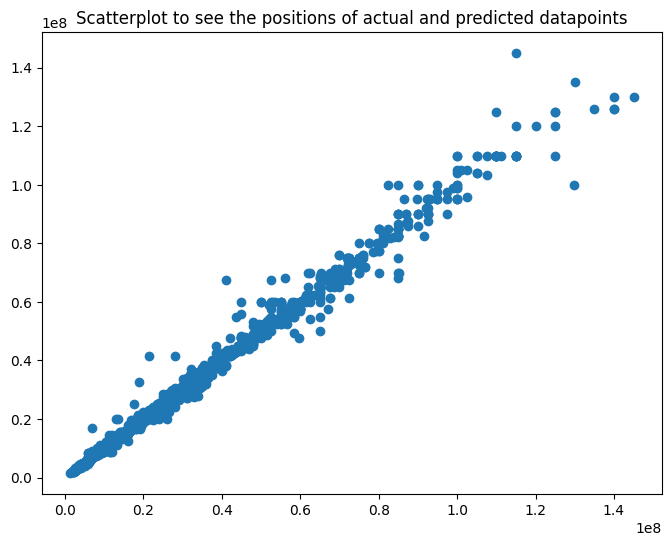

In [157]:
## Scatterplot to see the relation between original and predicted datapoints .
plt.figure(figsize=(8,6))
plt.scatter(y_test,DC_pred)
plt.title("Scatterplot to see the positions of actual and predicted datapoints")
plt.show()

In [158]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(SC_Xtrain,y_train)
RF_pred=RF.predict(SC_Xtest) ## Predicting the model with X_test .
RF_pred

array([13141000., 17613000., 20696000., ..., 35516000.,  6495840.,
        4049430.])

In [159]:
print("r2 score of RandomForestRegressor algorithm :", (r2_score(y_test,RF_pred))*100)
print("MAE of RandomForestRegressor algorithm :", mean_absolute_error(y_test,RF_pred))
print("MSE of RandomForestRegressor algorithm :", mean_squared_error(y_test,RF_pred))
print("RMSE or square root of MSE for RandomForestRegressor algorithm :", np.sqrt(mean_squared_error(y_test,RF_pred)))

r2 score of RandomForestRegressor algorithm : 99.72075376253702
MAE of RandomForestRegressor algorithm : 462705.8496732026
MSE of RandomForestRegressor algorithm : 1453480757032.4983
RMSE or square root of MSE for RandomForestRegressor algorithm : 1205603.8972367742


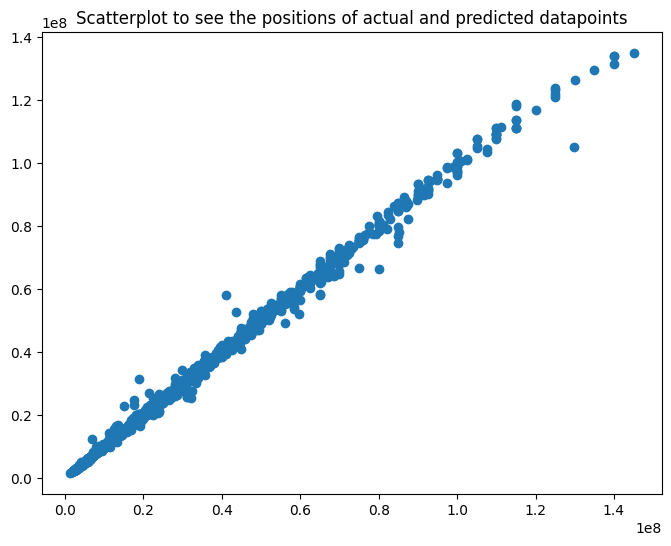

In [160]:
## Scatterplot to see the relation between original and predicted datapoints .
plt.figure(figsize=(8,6))
plt.scatter(y_test,RF_pred)
plt.title("Scatterplot to see the positions of actual and predicted datapoints")
plt.show()

In RandomForest the regression line is most prominent and the actual and predicted datapoints are extremely close with each other .

In [161]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(SC_Xtrain,y_train)
xgb_pred=xgb_model.predict(SC_Xtest) ## Predicting the model with X_test .
xgb_pred

array([12968020. , 17290614. , 19895648. , ..., 35550936. ,  6438541. ,
        3895308.2], dtype=float32)

In [162]:
print("r2 score of xgboostRegressor algorithm :", (r2_score(y_test,xgb_pred))*100)
print("MAE of xgboostRegressor algorithm :", mean_absolute_error(y_test,xgb_pred))
print("MSE of xgboostRegressor algorithm :", mean_squared_error(y_test,xgb_pred))
print("RMSE or square root of MSE for xgboostRegressor algorithm :", np.sqrt(mean_squared_error(y_test,xgb_pred)))

r2 score of xgboostRegressor algorithm : 99.69709440762618
MAE of xgboostRegressor algorithm : 623262.2651824618
MSE of xgboostRegressor algorithm : 1576628045959.733
RMSE or square root of MSE for xgboostRegressor algorithm : 1255638.501305106


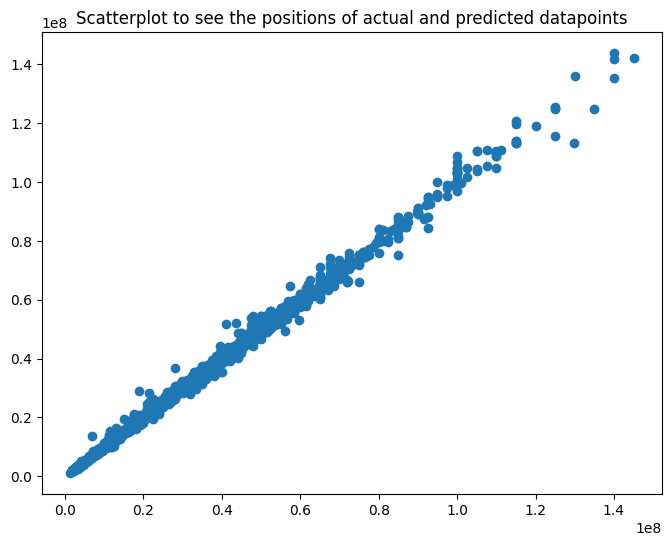

In [163]:
## Scatterplot to see the relation between original and predicted datapoints .
plt.figure(figsize=(8,6))
plt.scatter(y_test,xgb_pred)
plt.title("Scatterplot to see the positions of actual and predicted datapoints")
plt.show()

In [166]:
## Creating a pool of parameters from where GridSearchCV will choose the best parameter .
from sklearn.model_selection import GridSearchCV
xgb_params={'max_depth':[5,7,9,11],'n_estimators':[7,11,15,21],
            'learning_rate':[0.001,0.01,0.1],'gamma':[0.001,0.01,0.1]}
xgb_grid=GridSearchCV(estimator=xgb_model,param_grid=xgb_params,refit=True,verbose=1)
xgb_grid.fit(SC_Xtrain,y_train)
xgb_grid.best_params_  ## best_params_ will show us the best_parameters among the pool .

Fitting 5 folds for each of 144 candidates, totalling 720 fits


{'gamma': 0.001, 'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 21}

In [167]:
New_xgb=xgb.XGBRegressor(gamma=0.001,learning_rate=0.1,max_depth=11,n_estimators=21)
New_xgb.fit(SC_Xtrain,y_train)
New_xgb_pred=New_xgb.predict(SC_Xtest) ## Predicting the model with X_test .
xgb_pred

array([12968020. , 17290614. , 19895648. , ..., 35550936. ,  6438541. ,
        3895308.2], dtype=float32)

In [168]:
print("r2 score of xgboostRegressor algorithm after hyperparameter tuning :", (r2_score(y_test,New_xgb_pred))*100)
print("MAE of xgboostRegressor algorithm after hyperparameter tuning :", mean_absolute_error(y_test,New_xgb_pred))
print("MSE of xgboostRegressor algorithm after hyperparameter tuning :", mean_squared_error(y_test,New_xgb_pred))
print("RMSE or square root of MSE for xgboostRegressor algorithm after tuning :", np.sqrt(mean_squared_error(y_test,New_xgb_pred)))

r2 score of xgboostRegressor algorithm after hyperparameter tuning : 98.20971068621488
MAE of xgboostRegressor algorithm after hyperparameter tuning : 2026070.2461873638
MSE of xgboostRegressor algorithm after hyperparameter tuning : 9318482106504.781
RMSE or square root of MSE for xgboostRegressor algorithm after tuning : 3052618.89309897


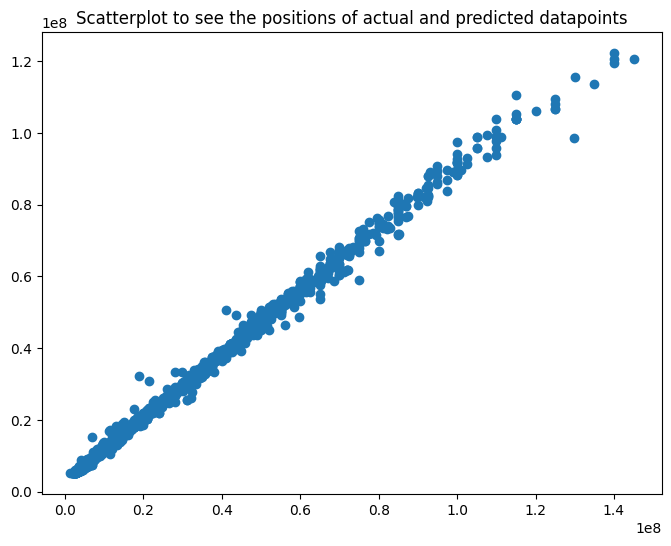

In [169]:
## Scatterplot to see the relation between original and predicted datapoints .
plt.figure(figsize=(8,6))
plt.scatter(y_test,New_xgb_pred)
plt.title("Scatterplot to see the positions of actual and predicted datapoints")
plt.show()

In [164]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=5,p=2)
KNN.fit(SC_Xtrain,y_train)
KNN_pred=KNN.predict(SC_Xtest) ## Predicting the model with X_test .
KNN_pred

array([14720000., 21120000., 17840000., ..., 35040000.,  6680000.,
        4943200.])

In [165]:
print("r2 score of KNeighborsRegressor algorithm :", (r2_score(y_test,KNN_pred))*100)
print("MAE of KNeighborsRegressor algorithm :", mean_absolute_error(y_test,KNN_pred))
print("MSE of KNeighborsRegressor algorithm :", mean_squared_error(y_test,KNN_pred))
print("RMSE or square root of MSE for KNeighborsRegressor algorithm :", np.sqrt(mean_squared_error(y_test,KNN_pred)))

r2 score of KNeighborsRegressor algorithm : 95.9680215837627
MAE of KNeighborsRegressor algorithm : 2560038.198983297
MSE of KNeighborsRegressor algorithm : 20986506726158.316
RMSE or square root of MSE for KNeighborsRegressor algorithm : 4581103.221513167


**r2 score comparison :**    

1. r2 score of Linear Regression algorithm : 94.83
2. r2 score of DecisionTreeRegressor algorithm : 99.14
3. r2 score of RandomForestRegressor algorithm : 99.72
4. r2 score of xgboostRegressor algorithm : 99.69
5. r2 score of xgboostRegressor algorithm after hyperparameter tuning : 98.20
6. r2 score of KNeighborsRegressor algorithm : 95.96

According to r2_score RandomForest Regressor algorithm giving us the highest amount of r2_score of 99.72 .

I have taken RMSE as the evaluation metrics in this project . There is a unwriiten rule that if the value of RMSE is less than 10% of our target variable's mean then the model is good .

If we comapre the rmse then RandomForestRegressor gives the least amount of RMSE which is 1205603.89 followed by xgboost with 1255638.50 .

10% of our target variable's mean is 3053318.23 which is way higher than our rmse of RandomForest algorithm .

ML and AI had had bring revolution in lots of industries . Housing and construction businesses will boom if they use AI , ML and Data analysis properly .